In [1]:
# Import the modules
import numpy as np
import pandas as pd

from pathlib import Path

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced

from sklearn.metrics import classification_report

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Select which features/columns to include in ML Model feature set
# Select which "derived" features to include in ML Model feature set

# Select crypto assets interested in evaluating
INCLUDE_BTEC = True
INCLUDE_ETH = True
INCLUDE_ADA = False

# Select the orderbook timeframe's interested in
INCLUDE_5MIN_DATA = True
INCLUDE_1MIN_DATA = True
INCLUDE_1SEC_DATA = False

NUM_ORDER_BOOK_LEVELS = 15

In [3]:
TURN_ON_PRINT_DEBUG = True

In [4]:
# Setting these options will allow for reviewing more of the DataFrames
pd.set_option('display.max_columns', 200)

### Import the DERIVED Crytpo Order Book Data

In [5]:
# dictionary to store crypto dataframes {BTEC, ETH, ADA}, {5min, 1min, 1sec}
crypto_ob_df_dict = {} 

# Based on the selection critero, read the csv crypto order book csv files into the dictrionary
if (INCLUDE_5MIN_DATA):
    if (INCLUDE_BTEC):
        crypto_ob_df_dict["crypto_BTC_5min"] = pd.read_csv(
            Path("./derived_data/crypto_BTC_5min.csv"), 
            index_col='system_time', 
            infer_datetime_format=True, 
            parse_dates=True
            )
    if (INCLUDE_ETH):
        crypto_ob_df_dict["crypto_ETH_5min"] = pd.read_csv(
            Path("./derived_data/crypto_ETH_5min.csv"), 
            index_col='system_time', 
            infer_datetime_format=True, 
            parse_dates=True
        )
    if (INCLUDE_ADA):
        crypto_ob_df_dict["crypto_ADA_5min"] = pd.read_csv(
            Path("./derived_data/crypto_ADA_5min.csv"), 
            index_col='system_time', 
            infer_datetime_format=True, 
            parse_dates=True
        )
    
if (INCLUDE_1MIN_DATA):
    if (INCLUDE_BTEC):
        crypto_ob_df_dict["crypto_BTC_1min"] = pd.read_csv(
            Path("./derived_data/crypto_BTC_1min.csv"), 
            index_col='system_time', 
            infer_datetime_format=True, 
            parse_dates=True
            )
    if (INCLUDE_ETH):
        crypto_ob_df_dict["crypto_ETH_1min"] = pd.read_csv(
            Path("./derived_data/crypto_ETH_1min.csv"), 
            index_col='system_time', 
            infer_datetime_format=True, 
            parse_dates=True
        )
    if (INCLUDE_ADA):
        crypto_ob_df_dict["crypto_ADA_1min"] = pd.read_csv(
            Path("./derived_data/crypto_ADA_1min.csv"), 
            index_col='system_time', 
            infer_datetime_format=True, 
            parse_dates=True
        )
    
if (INCLUDE_1SEC_DATA):
    if (INCLUDE_BTEC):
        crypto_ob_df_dict["crypto_BTC_1sec"] = pd.read_csv(
            Path("./derived_data/crypto_BTC_1sec.csv"), 
            index_col='system_time', 
            infer_datetime_format=True, 
            parse_dates=True
            )
    if (INCLUDE_ETH):
        crypto_ob_df_dict["crypto_ETH_1sec"] = pd.read_csv(
            Path("./derived_data/crypto_ETH_1sec.csv"), 
            index_col='system_time', 
            infer_datetime_format=True, 
            parse_dates=True
        )
    if (INCLUDE_ADA):
        crypto_ob_df_dict["crypto_ADA_1sec"] = pd.read_csv(
            Path("./derived_data/crypto_ADA_1sec.csv"), 
            index_col='system_time', 
            infer_datetime_format=True, 
            parse_dates=True
        )    

In [6]:
# Debug data checkpoint

if (TURN_ON_PRINT_DEBUG):
    display(crypto_ob_df_dict.keys())
    
    for crypto_ob_key in crypto_ob_df_dict: 
        print(f"\nDebug {crypto_ob_key} derived dataframe:")
        display(crypto_ob_df_dict[crypto_ob_key].shape)
        display(crypto_ob_df_dict[crypto_ob_key].head(n=5))

dict_keys(['crypto_BTC_5min', 'crypto_ETH_5min', 'crypto_BTC_1min', 'crypto_ETH_1min'])


Debug crypto_BTC_5min derived dataframe:


(3367, 199)

,midpoint,spread,buys,sells,bids_distance_0,bids_price_0,bids_limit_quantity_0,bids_limit_cum_quantity_0,bids_limit_notional_0,bids_limit_cum_notional_0,asks_distance_0,asks_price_0,asks_limit_quantity_0,asks_limit_cum_quantity_0,asks_limit_notional_0,bids_asks_imbalance_limit_notional_0,asks_limit_cum_notional_0,bids_distance_1,bids_price_1,bids_limit_quantity_1,bids_limit_cum_quantity_1,bids_limit_notional_1,bids_limit_cum_notional_1,asks_distance_1,asks_price_1,asks_limit_quantity_1,asks_limit_cum_quantity_1,asks_limit_notional_1,bids_asks_imbalance_limit_notional_1,asks_limit_cum_notional_1,bids_distance_2,bids_price_2,bids_limit_quantity_2,bids_limit_cum_quantity_2,bids_limit_notional_2,bids_limit_cum_notional_2,asks_distance_2,asks_price_2,asks_limit_quantity_2,asks_limit_cum_quantity_2,asks_limit_notional_2,bids_asks_imbalance_limit_notional_2,asks_limit_cum_notional_2,bids_distance_3,bids_price_3,bids_limit_quantity_3,bids_limit_cum_quantity_3,bids_limit_notional_3,bids_limit_cum_notional_3,asks_distance_3,asks_price_3,asks_limit_quantity_3,asks_limit_cum_quantity_3,asks_limit_notional_3,bids_asks_imbalance_limit_notional_3,asks_limit_cum_notional_3,bids_distance_4,bids_price_4,bids_limit_quantity_4,bids_limit_cum_quantity_4,bids_limit_notional_4,bids_limit_cum_notional_4,asks_distance_4,asks_price_4,asks_limit_quantity_4,asks_limit_cum_quantity_4,asks_limit_notional_4,bids_asks_imbalance_limit_notional_4,asks_limit_cum_notional_4,bids_distance_5,bids_price_5,bids_limit_quantity_5,bids_limit_cum_quantity_5,bids_limit_notional_5,bids_limit_cum_notional_5,asks_distance_5,asks_price_5,asks_limit_quantity_5,asks_limit_cum_quantity_5,asks_limit_notional_5,bids_asks_imbalance_limit_notional_5,asks_limit_cum_notional_5,bids_distance_6,bids_price_6,bids_limit_quantity_6,bids_limit_cum_quantity_6,bids_limit_notional_6,bids_limit_cum_notional_6,asks_distance_6,asks_price_6,asks_limit_quantity_6,asks_limit_cum_quantity_6,asks_limit_notional_6,bids_asks_imbalance_limit_notional_6,asks_limit_cum_notional_6,bids_distance_7,bids_price_7,bids_limit_quantity_7,bids_limit_cum_quantity_7,bids_limit_notional_7,bids_limit_cum_notional_7,asks_distance_7,asks_price_7,asks_limit_quantity_7,asks_limit_cum_quantity_7,asks_limit_notional_7,bids_asks_imbalance_limit_notional_7,asks_limit_cum_notional_7,bids_distance_8,bids_price_8,bids_limit_quantity_8,bids_limit_cum_quantity_8,bids_limit_notional_8,bids_limit_cum_notional_8,asks_distance_8,asks_price_8,asks_limit_quantity_8,asks_limit_cum_quantity_8,asks_limit_notional_8,bids_asks_imbalance_limit_notional_8,asks_limit_cum_notional_8,bids_distance_9,bids_price_9,bids_limit_quantity_9,bids_limit_cum_quantity_9,bids_limit_notional_9,bids_limit_cum_notional_9,asks_distance_9,asks_price_9,asks_limit_quantity_9,asks_limit_cum_quantity_9,asks_limit_notional_9,bids_asks_imbalance_limit_notional_9,asks_limit_cum_notional_9,bids_distance_10,bids_price_10,bids_limit_quantity_10,bids_limit_cum_quantity_10,bids_limit_notional_10,bids_limit_cum_notional_10,asks_distance_10,asks_price_10,asks_limit_quantity_10,asks_limit_cum_quantity_10,asks_limit_notional_10,bids_asks_imbalance_limit_notional_10,asks_limit_cum_notional_10,bids_distance_11,bids_price_11,bids_limit_quantity_11,bids_limit_cum_quantity_11,bids_limit_notional_11,bids_limit_cum_notional_11,asks_distance_11,asks_price_11,asks_limit_quantity_11,asks_limit_cum_quantity_11,asks_limit_notional_11,bids_asks_imbalance_limit_notional_11,asks_limit_cum_notional_11,bids_distance_12,bids_price_12,bids_limit_quantity_12,bids_limit_cum_quantity_12,bids_limit_notional_12,bids_limit_cum_notional_12,asks_distance_12,asks_price_12,asks_limit_quantity_12,asks_limit_cum_quantity_12,asks_limit_notional_12,bids_asks_imbalance_limit_notional_12,asks_limit_cum_notional_12,bids_distance_13,bids_price_13,bids_limit_quantity_13,bids_limit_cum_quantity_13,bids_limit_notional_13,bids_limit_cum_notional_13,asks_distance_13,asks_price_13,asks_limit_quantity_13,asks_limit_cum_qu


Debug crypto_ETH_5min derived dataframe:


(3365, 199)

,midpoint,spread,buys,sells,bids_distance_0,bids_price_0,bids_limit_quantity_0,bids_limit_cum_quantity_0,bids_limit_notional_0,bids_limit_cum_notional_0,asks_distance_0,asks_price_0,asks_limit_quantity_0,asks_limit_cum_quantity_0,asks_limit_notional_0,bids_asks_imbalance_limit_notional_0,asks_limit_cum_notional_0,bids_distance_1,bids_price_1,bids_limit_quantity_1,bids_limit_cum_quantity_1,bids_limit_notional_1,bids_limit_cum_notional_1,asks_distance_1,asks_price_1,asks_limit_quantity_1,asks_limit_cum_quantity_1,asks_limit_notional_1,bids_asks_imbalance_limit_notional_1,asks_limit_cum_notional_1,bids_distance_2,bids_price_2,bids_limit_quantity_2,bids_limit_cum_quantity_2,bids_limit_notional_2,bids_limit_cum_notional_2,asks_distance_2,asks_price_2,asks_limit_quantity_2,asks_limit_cum_quantity_2,asks_limit_notional_2,bids_asks_imbalance_limit_notional_2,asks_limit_cum_notional_2,bids_distance_3,bids_price_3,bids_limit_quantity_3,bids_limit_cum_quantity_3,bids_limit_notional_3,bids_limit_cum_notional_3,asks_distance_3,asks_price_3,asks_limit_quantity_3,asks_limit_cum_quantity_3,asks_limit_notional_3,bids_asks_imbalance_limit_notional_3,asks_limit_cum_notional_3,bids_distance_4,bids_price_4,bids_limit_quantity_4,bids_limit_cum_quantity_4,bids_limit_notional_4,bids_limit_cum_notional_4,asks_distance_4,asks_price_4,asks_limit_quantity_4,asks_limit_cum_quantity_4,asks_limit_notional_4,bids_asks_imbalance_limit_notional_4,asks_limit_cum_notional_4,bids_distance_5,bids_price_5,bids_limit_quantity_5,bids_limit_cum_quantity_5,bids_limit_notional_5,bids_limit_cum_notional_5,asks_distance_5,asks_price_5,asks_limit_quantity_5,asks_limit_cum_quantity_5,asks_limit_notional_5,bids_asks_imbalance_limit_notional_5,asks_limit_cum_notional_5,bids_distance_6,bids_price_6,bids_limit_quantity_6,bids_limit_cum_quantity_6,bids_limit_notional_6,bids_limit_cum_notional_6,asks_distance_6,asks_price_6,asks_limit_quantity_6,asks_limit_cum_quantity_6,asks_limit_notional_6,bids_asks_imbalance_limit_notional_6,asks_limit_cum_notional_6,bids_distance_7,bids_price_7,bids_limit_quantity_7,bids_limit_cum_quantity_7,bids_limit_notional_7,bids_limit_cum_notional_7,asks_distance_7,asks_price_7,asks_limit_quantity_7,asks_limit_cum_quantity_7,asks_limit_notional_7,bids_asks_imbalance_limit_notional_7,asks_limit_cum_notional_7,bids_distance_8,bids_price_8,bids_limit_quantity_8,bids_limit_cum_quantity_8,bids_limit_notional_8,bids_limit_cum_notional_8,asks_distance_8,asks_price_8,asks_limit_quantity_8,asks_limit_cum_quantity_8,asks_limit_notional_8,bids_asks_imbalance_limit_notional_8,asks_limit_cum_notional_8,bids_distance_9,bids_price_9,bids_limit_quantity_9,bids_limit_cum_quantity_9,bids_limit_notional_9,bids_limit_cum_notional_9,asks_distance_9,asks_price_9,asks_limit_quantity_9,asks_limit_cum_quantity_9,asks_limit_notional_9,bids_asks_imbalance_limit_notional_9,asks_limit_cum_notional_9,bids_distance_10,bids_price_10,bids_limit_quantity_10,bids_limit_cum_quantity_10,bids_limit_notional_10,bids_limit_cum_notional_10,asks_distance_10,asks_price_10,asks_limit_quantity_10,asks_limit_cum_quantity_10,asks_limit_notional_10,bids_asks_imbalance_limit_notional_10,asks_limit_cum_notional_10,bids_distance_11,bids_price_11,bids_limit_quantity_11,bids_limit_cum_quantity_11,bids_limit_notional_11,bids_limit_cum_notional_11,asks_distance_11,asks_price_11,asks_limit_quantity_11,asks_limit_cum_quantity_11,asks_limit_notional_11,bids_asks_imbalance_limit_notional_11,asks_limit_cum_notional_11,bids_distance_12,bids_price_12,bids_limit_quantity_12,bids_limit_cum_quantity_12,bids_limit_notional_12,bids_limit_cum_notional_12,asks_distance_12,asks_price_12,asks_limit_quantity_12,asks_limit_cum_quantity_12,asks_limit_notional_12,bids_asks_imbalance_limit_notional_12,asks_limit_cum_notional_12,bids_distance_13,bids_price_13,bids_limit_quantity_13,bids_limit_cum_quantity_13,bids_limit_notional_13,bids_limit_cum_notional_13,asks_distance_13,asks_price_13,asks_limit_quantity_13,asks_limit_cum_qu


Debug crypto_BTC_1min derived dataframe:


(17113, 199)

,midpoint,spread,buys,sells,bids_distance_0,bids_price_0,bids_limit_quantity_0,bids_limit_cum_quantity_0,bids_limit_notional_0,bids_limit_cum_notional_0,asks_distance_0,asks_price_0,asks_limit_quantity_0,asks_limit_cum_quantity_0,asks_limit_notional_0,bids_asks_imbalance_limit_notional_0,asks_limit_cum_notional_0,bids_distance_1,bids_price_1,bids_limit_quantity_1,bids_limit_cum_quantity_1,bids_limit_notional_1,bids_limit_cum_notional_1,asks_distance_1,asks_price_1,asks_limit_quantity_1,asks_limit_cum_quantity_1,asks_limit_notional_1,bids_asks_imbalance_limit_notional_1,asks_limit_cum_notional_1,bids_distance_2,bids_price_2,bids_limit_quantity_2,bids_limit_cum_quantity_2,bids_limit_notional_2,bids_limit_cum_notional_2,asks_distance_2,asks_price_2,asks_limit_quantity_2,asks_limit_cum_quantity_2,asks_limit_notional_2,bids_asks_imbalance_limit_notional_2,asks_limit_cum_notional_2,bids_distance_3,bids_price_3,bids_limit_quantity_3,bids_limit_cum_quantity_3,bids_limit_notional_3,bids_limit_cum_notional_3,asks_distance_3,asks_price_3,asks_limit_quantity_3,asks_limit_cum_quantity_3,asks_limit_notional_3,bids_asks_imbalance_limit_notional_3,asks_limit_cum_notional_3,bids_distance_4,bids_price_4,bids_limit_quantity_4,bids_limit_cum_quantity_4,bids_limit_notional_4,bids_limit_cum_notional_4,asks_distance_4,asks_price_4,asks_limit_quantity_4,asks_limit_cum_quantity_4,asks_limit_notional_4,bids_asks_imbalance_limit_notional_4,asks_limit_cum_notional_4,bids_distance_5,bids_price_5,bids_limit_quantity_5,bids_limit_cum_quantity_5,bids_limit_notional_5,bids_limit_cum_notional_5,asks_distance_5,asks_price_5,asks_limit_quantity_5,asks_limit_cum_quantity_5,asks_limit_notional_5,bids_asks_imbalance_limit_notional_5,asks_limit_cum_notional_5,bids_distance_6,bids_price_6,bids_limit_quantity_6,bids_limit_cum_quantity_6,bids_limit_notional_6,bids_limit_cum_notional_6,asks_distance_6,asks_price_6,asks_limit_quantity_6,asks_limit_cum_quantity_6,asks_limit_notional_6,bids_asks_imbalance_limit_notional_6,asks_limit_cum_notional_6,bids_distance_7,bids_price_7,bids_limit_quantity_7,bids_limit_cum_quantity_7,bids_limit_notional_7,bids_limit_cum_notional_7,asks_distance_7,asks_price_7,asks_limit_quantity_7,asks_limit_cum_quantity_7,asks_limit_notional_7,bids_asks_imbalance_limit_notional_7,asks_limit_cum_notional_7,bids_distance_8,bids_price_8,bids_limit_quantity_8,bids_limit_cum_quantity_8,bids_limit_notional_8,bids_limit_cum_notional_8,asks_distance_8,asks_price_8,asks_limit_quantity_8,asks_limit_cum_quantity_8,asks_limit_notional_8,bids_asks_imbalance_limit_notional_8,asks_limit_cum_notional_8,bids_distance_9,bids_price_9,bids_limit_quantity_9,bids_limit_cum_quantity_9,bids_limit_notional_9,bids_limit_cum_notional_9,asks_distance_9,asks_price_9,asks_limit_quantity_9,asks_limit_cum_quantity_9,asks_limit_notional_9,bids_asks_imbalance_limit_notional_9,asks_limit_cum_notional_9,bids_distance_10,bids_price_10,bids_limit_quantity_10,bids_limit_cum_quantity_10,bids_limit_notional_10,bids_limit_cum_notional_10,asks_distance_10,asks_price_10,asks_limit_quantity_10,asks_limit_cum_quantity_10,asks_limit_notional_10,bids_asks_imbalance_limit_notional_10,asks_limit_cum_notional_10,bids_distance_11,bids_price_11,bids_limit_quantity_11,bids_limit_cum_quantity_11,bids_limit_notional_11,bids_limit_cum_notional_11,asks_distance_11,asks_price_11,asks_limit_quantity_11,asks_limit_cum_quantity_11,asks_limit_notional_11,bids_asks_imbalance_limit_notional_11,asks_limit_cum_notional_11,bids_distance_12,bids_price_12,bids_limit_quantity_12,bids_limit_cum_quantity_12,bids_limit_notional_12,bids_limit_cum_notional_12,asks_distance_12,asks_price_12,asks_limit_quantity_12,asks_limit_cum_quantity_12,asks_limit_notional_12,bids_asks_imbalance_limit_notional_12,asks_limit_cum_notional_12,bids_distance_13,bids_price_13,bids_limit_quantity_13,bids_limit_cum_quantity_13,bids_limit_notional_13,bids_limit_cum_notional_13,asks_distance_13,asks_price_13,asks_limit_quantity_13,asks_limit_cum_qu


Debug crypto_ETH_1min derived dataframe:


(17110, 199)

,midpoint,spread,buys,sells,bids_distance_0,bids_price_0,bids_limit_quantity_0,bids_limit_cum_quantity_0,bids_limit_notional_0,bids_limit_cum_notional_0,asks_distance_0,asks_price_0,asks_limit_quantity_0,asks_limit_cum_quantity_0,asks_limit_notional_0,bids_asks_imbalance_limit_notional_0,asks_limit_cum_notional_0,bids_distance_1,bids_price_1,bids_limit_quantity_1,bids_limit_cum_quantity_1,bids_limit_notional_1,bids_limit_cum_notional_1,asks_distance_1,asks_price_1,asks_limit_quantity_1,asks_limit_cum_quantity_1,asks_limit_notional_1,bids_asks_imbalance_limit_notional_1,asks_limit_cum_notional_1,bids_distance_2,bids_price_2,bids_limit_quantity_2,bids_limit_cum_quantity_2,bids_limit_notional_2,bids_limit_cum_notional_2,asks_distance_2,asks_price_2,asks_limit_quantity_2,asks_limit_cum_quantity_2,asks_limit_notional_2,bids_asks_imbalance_limit_notional_2,asks_limit_cum_notional_2,bids_distance_3,bids_price_3,bids_limit_quantity_3,bids_limit_cum_quantity_3,bids_limit_notional_3,bids_limit_cum_notional_3,asks_distance_3,asks_price_3,asks_limit_quantity_3,asks_limit_cum_quantity_3,asks_limit_notional_3,bids_asks_imbalance_limit_notional_3,asks_limit_cum_notional_3,bids_distance_4,bids_price_4,bids_limit_quantity_4,bids_limit_cum_quantity_4,bids_limit_notional_4,bids_limit_cum_notional_4,asks_distance_4,asks_price_4,asks_limit_quantity_4,asks_limit_cum_quantity_4,asks_limit_notional_4,bids_asks_imbalance_limit_notional_4,asks_limit_cum_notional_4,bids_distance_5,bids_price_5,bids_limit_quantity_5,bids_limit_cum_quantity_5,bids_limit_notional_5,bids_limit_cum_notional_5,asks_distance_5,asks_price_5,asks_limit_quantity_5,asks_limit_cum_quantity_5,asks_limit_notional_5,bids_asks_imbalance_limit_notional_5,asks_limit_cum_notional_5,bids_distance_6,bids_price_6,bids_limit_quantity_6,bids_limit_cum_quantity_6,bids_limit_notional_6,bids_limit_cum_notional_6,asks_distance_6,asks_price_6,asks_limit_quantity_6,asks_limit_cum_quantity_6,asks_limit_notional_6,bids_asks_imbalance_limit_notional_6,asks_limit_cum_notional_6,bids_distance_7,bids_price_7,bids_limit_quantity_7,bids_limit_cum_quantity_7,bids_limit_notional_7,bids_limit_cum_notional_7,asks_distance_7,asks_price_7,asks_limit_quantity_7,asks_limit_cum_quantity_7,asks_limit_notional_7,bids_asks_imbalance_limit_notional_7,asks_limit_cum_notional_7,bids_distance_8,bids_price_8,bids_limit_quantity_8,bids_limit_cum_quantity_8,bids_limit_notional_8,bids_limit_cum_notional_8,asks_distance_8,asks_price_8,asks_limit_quantity_8,asks_limit_cum_quantity_8,asks_limit_notional_8,bids_asks_imbalance_limit_notional_8,asks_limit_cum_notional_8,bids_distance_9,bids_price_9,bids_limit_quantity_9,bids_limit_cum_quantity_9,bids_limit_notional_9,bids_limit_cum_notional_9,asks_distance_9,asks_price_9,asks_limit_quantity_9,asks_limit_cum_quantity_9,asks_limit_notional_9,bids_asks_imbalance_limit_notional_9,asks_limit_cum_notional_9,bids_distance_10,bids_price_10,bids_limit_quantity_10,bids_limit_cum_quantity_10,bids_limit_notional_10,bids_limit_cum_notional_10,asks_distance_10,asks_price_10,asks_limit_quantity_10,asks_limit_cum_quantity_10,asks_limit_notional_10,bids_asks_imbalance_limit_notional_10,asks_limit_cum_notional_10,bids_distance_11,bids_price_11,bids_limit_quantity_11,bids_limit_cum_quantity_11,bids_limit_notional_11,bids_limit_cum_notional_11,asks_distance_11,asks_price_11,asks_limit_quantity_11,asks_limit_cum_quantity_11,asks_limit_notional_11,bids_asks_imbalance_limit_notional_11,asks_limit_cum_notional_11,bids_distance_12,bids_price_12,bids_limit_quantity_12,bids_limit_cum_quantity_12,bids_limit_notional_12,bids_limit_cum_notional_12,asks_distance_12,asks_price_12,asks_limit_quantity_12,asks_limit_cum_quantity_12,asks_limit_notional_12,bids_asks_imbalance_limit_notional_12,asks_limit_cum_notional_12,bids_distance_13,bids_price_13,bids_limit_quantity_13,bids_limit_cum_quantity_13,bids_limit_notional_13,bids_limit_cum_notional_13,asks_distance_13,asks_price_13,asks_limit_quantity_13,asks_limit_cum_qu

In [7]:
# Print confusion matrix
def confusion_matrix_sklearn(y_test, y_pred, plt_title):
    """
    To plot the confusion_matrix with percentages
    prediction:  predicted values
    original:    original values
    """
    cm = confusion_matrix(y_test, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(3, 2))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.title(plt_title)

### Run the machine learning algorithms in a loop for all the crypto assets and timeframes

In [8]:
    logreg_class_rpt_dict = {}
    svm_class_rpt_dict = {}
    dectree_class_rpt_dict = {}
    rndfor_class_rpt_dict = {}
    knn_class_rpt_dict = {}
    
    logreg_class_rpt_scaled_dict = {}
    svm_class_rpt_scaled_dict = {}
    dectree_class_rpt_scaled_dict = {}
    rndfor_class_rpt_scaled_dict = {}
    knn_class_rpt_scaled_dict = {}

In [9]:
for crypto_ob_key in crypto_ob_df_dict:

    # Select which crypto order book data file to analyze
    crypto_sel_df = crypto_ob_df_dict[crypto_ob_key]
    print(f"\n\n\n\nEvaluating Crypto DataFrame: {crypto_ob_key}")

    # Find the location of the "midpoint" column, and initialize the "Signal" to 0 (to be placed next the midpotint column entry)
    midpoint_column_index = crypto_ob_df_dict[crypto_ob_key].columns.get_loc("midpoint")
    if 'Signal' in crypto_sel_df.columns:
        crypto_sel_df["Signal"] = 0.0
    else:
        crypto_sel_df.insert(midpoint_column_index+1, "Signal", 0.0)        
    
    # If the midpoint price increases, set Signal to +1, else if it decreases, set to -1
    crypto_sel_df.loc[(crypto_sel_df['midpoint'].shift(-1) >= crypto_sel_df['midpoint']), 'Signal'] = 1
    crypto_sel_df.loc[(crypto_sel_df['midpoint'].shift(-1) < crypto_sel_df['midpoint']), 'Signal'] = -1
    
    # drop the last row (don't know if the next row midpoint went up or down)
    crypto_sel_df.drop(index=crypto_sel_df.index[-1],axis=0,inplace=True)
        
    # Separate the data into labels and features
    
    # Separate the y variable, the labels
    y_srs = crypto_sel_df['Signal']
    
    # Separate the X variable, the features
    X_df = crypto_sel_df.drop(columns='Signal')

    x = crypto_sel_df.isna().sum()
    if (x.sum() > 0):
        #na_df = crypto_sel_df[crypto_sel_df.isna()]
        #display(crypto_sel_df)
        nan_in_col  = crypto_sel_df.isna()
        display(nan_in_col)
        
    # Split the data using train_test_split
    # Assign a random_state of 1 to the function
    X_train_df, X_test_df, y_train_srs, y_test_srs = train_test_split(X_df, y_srs, random_state=1)
        
    # Instantiate the Logistic Regression model
    # Assign a random_state parameter of 1 to the model
    logreg_model = LogisticRegression(random_state=1)
    
    # Fit the model using training data
    logreg_model.fit(X_train_df, y_train_srs)
    
    #### svm_model = SVC(kernel='linear')
    #### 
    #### # Fit the data
    #### svm_model.fit(X_train_df, y_train_srs)
    
    # Creating the decision tree classifier instance
    dectree_model = tree.DecisionTreeClassifier(random_state=1)
    
    # Fitting the model
    dectree_model = dectree_model.fit(X_train_df, y_train_srs)
    
    # Create a random forest classifier
    rndfor_model = RandomForestClassifier(n_estimators=100, random_state=1)
    
    # Fitting the model
    rndfor_model = rndfor_model.fit(X_train_df, y_train_srs)
    
    # Instantiate the model with k = 3 neighbors
    knn_model = KNeighborsClassifier(n_neighbors=3)
    
    # Train the model
    knn_model.fit(X_train_df, y_train_srs)
    
    # Make a prediction using the testing data on the logistics Regression model
    logreg_y_pred_npa = logreg_model.predict(X_test_df)
    
    #### # Make a prediction using the testing data on the Support Vector Matrix model
    #### svm_y_pred_npa = svm_model.predict(X_test_df)
    
    # Make a prediction using the testing data on the Decision Tree model
    dectree_y_pred_npa = dectree_model.predict(X_test_df)
    
    # Make a prediction using the testing data on the Random Forest model
    rndfor_y_pred_npa = rndfor_model.predict(X_test_df)
    
    # Make a prediction using the testing data on the KNN model
    knn_y_pred_npa = knn_model.predict(X_test_df)
    
    print("\n\n")
    print(f"Balanced Accuracy Scores {crypto_ob_key}:")
    print("------------------------------------------")
    
    # Print the balanced_accuracy score of the Logistic Regression Model
    print("Logistic Regression:                  ", balanced_accuracy_score(y_test_srs, logreg_y_pred_npa))
    
    #### # Print the balanced_accuracy score of the Support Vector Matrix Model
    #### print("Support Vector Machine:               ", balanced_accuracy_score(y_test_srs, svm_y_pred_npa))
    
    # Print the balanced_accuracy score of the Decision Tree Model
    print("Decision Tree:                        ", balanced_accuracy_score(y_test_srs, dectree_y_pred_npa))
    
    # Print the balanced_accuracy score of the Random Forest Model
    print("Random Forest:                        ", balanced_accuracy_score(y_test_srs, rndfor_y_pred_npa))
    
    # Print the balanced_accuracy score of the KNN Model
    print("KNN:                                  ", balanced_accuracy_score(y_test_srs, knn_y_pred_npa))
                
    #### confusion_matrix_sklearn(y_test_srs, logreg_y_pred_npa, "Logistic Regression")
    #### #### confusion_matrix_sklearn(y_test_srs, svm_y_pred_npa, "SVM")
    #### confusion_matrix_sklearn(y_test_srs, dectree_y_pred_npa, "Decision Tree")
    #### confusion_matrix_sklearn(y_test_srs, rndfor_y_pred_npa, "Random Forest")
    #### confusion_matrix_sklearn(y_test_srs, knn_y_pred_npa, "KNN")

    print("\n\n")
    print(f"Classification Report {crypto_ob_key}:")
    print("---------------------------------------")
    
    # Print the classification report for the Logistics Regression model
    logreg_class_rpt = classification_report(y_test_srs, logreg_y_pred_npa)
    
    #### # Print the classification report for the SVM model
    #### svm_class_rpt = classification_report(y_test_srs, svm_y_pred_npa)
    
    # Print the classification report for the Decision Tree model
    dectree_class_rpt = classification_report(y_test_srs, dectree_y_pred_npa)
    
    # Print the classification report for the Random Forest model
    rndfor_class_rpt = classification_report(y_test_srs, rndfor_y_pred_npa)
    
    # Print the classification report for the KNN model
    knn_class_rpt = classification_report(y_test_srs, knn_y_pred_npa)
    
    print("Logistic Regression Classification Report:\n", logreg_class_rpt)
    ####print("SVM Classification Report:\n", svm_class_rpt)
    print("Decision Tree Classification Report:\n", dectree_class_rpt)
    print("Random Forest Classification Report:\n", rndfor_class_rpt)
    print("KNN Classification Report:\n", knn_class_rpt)
    
    # (Re-)Calculate classificaiton report to output to a dictionary format
    logreg_class_rpt_dict[crypto_ob_key] = classification_report(y_test_srs, logreg_y_pred_npa, output_dict = True)
    #### svm_class_rpt_dict[crypto_ob_key] = classification_report(y_test_srs, svm_y_pred_npa, output_dict = True)
    dectree_class_rpt_dict[crypto_ob_key] = classification_report(y_test_srs, dectree_y_pred_npa, output_dict = True)
    rndfor_class_rpt_dict[crypto_ob_key] = classification_report(y_test_srs, rndfor_y_pred_npa, output_dict = True)
    knn_class_rpt_dict[crypto_ob_key] = classification_report(y_test_srs, knn_y_pred_npa, output_dict = True)

    # Scale the data
    scaler = StandardScaler()
    X_scaler = scaler.fit(X_train_df)
    X_train_scaled_npa = X_scaler.transform(X_train_df)
    X_test_scaled_npa = X_scaler.transform(X_test_df)
    
    # Instantiate the Logistic Regression model
    # Assign a random_state parameter of 1 to the model
    logreg_model = LogisticRegression(random_state=1)
    
    # Fit the model using training data
    logreg_model.fit(X_train_scaled_npa, y_train_srs)
    
    #### svm_model = SVC(kernel='linear')
    #### 
    #### # Fit the data
    #### svm_model.fit(X_train_scaled_npa, y_train_srs)
    
    # Creating the decision tree classifier instance
    dectree_model = tree.DecisionTreeClassifier(random_state=1)
    
    # Fitting the model
    dectree_model = dectree_model.fit(X_train_scaled_npa, y_train_srs)
    
    # Create a random forest classifier
    rndfor_model = RandomForestClassifier(n_estimators=100, random_state=1)
    
    # Fitting the model
    rndfor_model = rndfor_model.fit(X_train_scaled_npa, y_train_srs)
    
    # Instantiate the model with k = 3 neighbors
    knn_model = KNeighborsClassifier(n_neighbors=3)
    
    # Train the model
    knn_model.fit(X_train_scaled_npa, y_train_srs)
    
    # Make a prediction using the testing data on the logistics Regression model
    logreg_y_pred_npa = logreg_model.predict(X_test_scaled_npa)
    
    #### # Make a prediction using the testing data on the Support Vector Matrix model
    #### svm_y_pred_npa = svm_model.predict(X_test_scaled_npa)
    
    # Make a prediction using the testing data on the Decision Tree model
    dectree_y_pred_npa = dectree_model.predict(X_test_scaled_npa)
    
    # Make a prediction using the testing data on the Random Forest model
    rndfor_y_pred_npa = rndfor_model.predict(X_test_scaled_npa)
    
    # Make a prediction using the testing data on the KNN model
    knn_y_pred_npa = knn_model.predict(X_test_scaled_npa)
    
    print("\n\n")
    print(f"Balanced Accuracy Scores w/ Scaling {crypto_ob_key}:")
    print("-----------------------------------------------------")
    
    # Print the balanced_accuracy score of the Logistic Regression Model
    print("Logistic Regression:                  ", balanced_accuracy_score(y_test_srs, logreg_y_pred_npa))
    
    #### # Print the balanced_accuracy score of the Support Vector Matrix Model
    #### print("Support Vector Machine:               ", balanced_accuracy_score(y_test_srs, svm_y_pred_npa))
    
    # Print the balanced_accuracy score of the Decision Tree Model
    print("Decision Tree:                        ", balanced_accuracy_score(y_test_srs, dectree_y_pred_npa))
    
    # Print the balanced_accuracy score of the Random Forest Model
    print("Random Forest:                        ", balanced_accuracy_score(y_test_srs, rndfor_y_pred_npa))
    
    # Print the balanced_accuracy score of the KNN Model
    print("KNN:                                  ", balanced_accuracy_score(y_test_srs, knn_y_pred_npa))
                
    #### confusion_matrix_sklearn(y_test_srs, logreg_y_pred_npa, "Logistic Regression")
    #### #### confusion_matrix_sklearn(y_test_srs, svm_y_pred_npa, "SVM")
    #### confusion_matrix_sklearn(y_test_srs, dectree_y_pred_npa, "Decision Tree")
    #### confusion_matrix_sklearn(y_test_srs, rndfor_y_pred_npa, "Random Forest")
    #### confusion_matrix_sklearn(y_test_srs, knn_y_pred_npa, "KNN")
    
    print("\n\n")
    print(f"Classification Report w/ Scaling {crypto_ob_key}:")
    print("---------------------------------------")
    
    # Print the classification report for the Logistics Regression model
    logreg_class_rpt = classification_report(y_test_srs, logreg_y_pred_npa)
    
    #### # Print the classification report for the SVM model
    #### svm_class_rpt = classification_report(y_test_srs, svm_y_pred_npa)
    
    # Print the classification report for the Decision Tree model
    dectree_class_rpt = classification_report(y_test_srs, dectree_y_pred_npa)
    
    # Print the classification report for the Random Forest model
    rndfor_class_rpt = classification_report(y_test_srs, rndfor_y_pred_npa)
    
    # Print the classification report for the KNN model
    knn_class_rpt = classification_report(y_test_srs, knn_y_pred_npa)
    
    print("Logistic Regression Classification Report:\n", logreg_class_rpt)
    ####print("SVM Classification Report:\n", svm_class_rpt)
    print("Decision Tree Classification Report:\n", dectree_class_rpt)
    print("Random Forest Classification Report:\n", rndfor_class_rpt)
    print("KNN Classification Report:\n", knn_class_rpt)
        
    # (Re-)Calculate classificaiton report w/ scaling to output to a dictionary format
    logreg_class_rpt_scaled_dict[crypto_ob_key] = classification_report(y_test_srs, logreg_y_pred_npa, output_dict = True)
    #### svm_class_rpt_scaled_dict[crypto_ob_key] = classification_report(y_test_srs, svm_y_pred_npa, output_dict = True)
    dectree_class_rpt_scaled_dict[crypto_ob_key] = classification_report(y_test_srs, dectree_y_pred_npa, output_dict = True)
    rndfor_class_rpt_scaled_dict[crypto_ob_key] = classification_report(y_test_srs, rndfor_y_pred_npa, output_dict = True)
    knn_class_rpt_scaled_dict[crypto_ob_key] = classification_report(y_test_srs, knn_y_pred_npa, output_dict = True)






Evaluating Crypto DataFrame: crypto_BTC_5min



Balanced Accuracy Scores crypto_BTC_5min:
------------------------------------------
Logistic Regression:                   0.5116341395983909
Decision Tree:                         0.4904478184577712
Random Forest:                         0.5379661131705005
KNN:                                   0.5058706703453568



Classification Report crypto_BTC_5min:
---------------------------------------
Logistic Regression Classification Report:
               precision    recall  f1-score   support

        -1.0       0.51      0.46      0.48       419
         1.0       0.51      0.56      0.54       423

    accuracy                           0.51       842
   macro avg       0.51      0.51      0.51       842
weighted avg       0.51      0.51      0.51       842

Decision Tree Classification Report:
               precision    recall  f1-score   support

        -1.0       0.49      0.48      0.48       419
         1.0       0.49      0.

In [30]:
accuracy_npa = np.array([logreg_class_rpt_dict["crypto_BTC_5min"]['accuracy'],dectree_class_rpt_dict["crypto_BTC_5min"]['accuracy'],rndfor_class_rpt_dict["crypto_BTC_5min"]['accuracy'],knn_class_rpt_dict["crypto_BTC_5min"]['accuracy'],
                         logreg_class_rpt_dict["crypto_ETH_5min"]['accuracy'],dectree_class_rpt_dict["crypto_ETH_5min"]['accuracy'],rndfor_class_rpt_dict["crypto_ETH_5min"]['accuracy'],knn_class_rpt_dict["crypto_ETH_5min"]['accuracy'],
                         logreg_class_rpt_dict["crypto_BTC_1min"]['accuracy'],dectree_class_rpt_dict["crypto_BTC_1min"]['accuracy'],rndfor_class_rpt_dict["crypto_BTC_1min"]['accuracy'],knn_class_rpt_dict["crypto_BTC_1min"]['accuracy'],
                         logreg_class_rpt_dict["crypto_ETH_1min"]['accuracy'],dectree_class_rpt_dict["crypto_ETH_1min"]['accuracy'],rndfor_class_rpt_dict["crypto_ETH_1min"]['accuracy'],knn_class_rpt_dict["crypto_ETH_1min"]['accuracy'],])
accuracy_scaled_npa = np.array([logreg_class_rpt_scaled_dict["crypto_BTC_5min"]['accuracy'],dectree_class_rpt_scaled_dict["crypto_BTC_5min"]['accuracy'],rndfor_class_rpt_scaled_dict["crypto_BTC_5min"]['accuracy'],knn_class_rpt_scaled_dict["crypto_BTC_5min"]['accuracy'],
                                logreg_class_rpt_scaled_dict["crypto_ETH_5min"]['accuracy'],dectree_class_rpt_scaled_dict["crypto_ETH_5min"]['accuracy'],rndfor_class_rpt_scaled_dict["crypto_ETH_5min"]['accuracy'],knn_class_rpt_scaled_dict["crypto_ETH_5min"]['accuracy'],
                                logreg_class_rpt_scaled_dict["crypto_BTC_1min"]['accuracy'],dectree_class_rpt_scaled_dict["crypto_BTC_1min"]['accuracy'],rndfor_class_rpt_scaled_dict["crypto_BTC_1min"]['accuracy'],knn_class_rpt_scaled_dict["crypto_BTC_1min"]['accuracy'],
                                logreg_class_rpt_scaled_dict["crypto_ETH_1min"]['accuracy'],dectree_class_rpt_scaled_dict["crypto_ETH_1min"]['accuracy'],rndfor_class_rpt_scaled_dict["crypto_ETH_1min"]['accuracy'],knn_class_rpt_scaled_dict["crypto_ETH_1min"]['accuracy'],])
precision_1_npa = np.array([logreg_class_rpt_dict["crypto_BTC_5min"]['1.0']['precision'],dectree_class_rpt_dict["crypto_BTC_5min"]['1.0']['precision'],rndfor_class_rpt_dict["crypto_BTC_5min"]['1.0']['precision'],knn_class_rpt_dict["crypto_BTC_5min"]['1.0']['precision'],
                           logreg_class_rpt_dict["crypto_ETH_5min"]['1.0']['precision'],dectree_class_rpt_dict["crypto_ETH_5min"]['1.0']['precision'],rndfor_class_rpt_dict["crypto_ETH_5min"]['1.0']['precision'],knn_class_rpt_dict["crypto_ETH_5min"]['1.0']['precision'],
                           logreg_class_rpt_dict["crypto_BTC_1min"]['1.0']['precision'],dectree_class_rpt_dict["crypto_BTC_1min"]['1.0']['precision'],rndfor_class_rpt_dict["crypto_BTC_1min"]['1.0']['precision'],knn_class_rpt_dict["crypto_BTC_1min"]['1.0']['precision'],
                           logreg_class_rpt_dict["crypto_ETH_1min"]['1.0']['precision'],dectree_class_rpt_dict["crypto_ETH_1min"]['1.0']['precision'],rndfor_class_rpt_dict["crypto_ETH_1min"]['1.0']['precision'],knn_class_rpt_dict["crypto_ETH_1min"]['1.0']['precision'],])
precision_1_scaled_npa = np.array([logreg_class_rpt_scaled_dict["crypto_BTC_5min"]['1.0']['precision'],dectree_class_rpt_scaled_dict["crypto_BTC_5min"]['1.0']['precision'],rndfor_class_rpt_scaled_dict["crypto_BTC_5min"]['1.0']['precision'],knn_class_rpt_scaled_dict["crypto_BTC_5min"]['1.0']['precision'],
                                  logreg_class_rpt_scaled_dict["crypto_ETH_5min"]['1.0']['precision'],dectree_class_rpt_scaled_dict["crypto_ETH_5min"]['1.0']['precision'],rndfor_class_rpt_scaled_dict["crypto_ETH_5min"]['1.0']['precision'],knn_class_rpt_scaled_dict["crypto_ETH_5min"]['1.0']['precision'],
                                  logreg_class_rpt_scaled_dict["crypto_BTC_1min"]['1.0']['precision'],dectree_class_rpt_scaled_dict["crypto_BTC_1min"]['1.0']['precision'],rndfor_class_rpt_scaled_dict["crypto_BTC_1min"]['1.0']['precision'],knn_class_rpt_scaled_dict["crypto_BTC_1min"]['1.0']['precision'],
                                  logreg_class_rpt_scaled_dict["crypto_ETH_1min"]['1.0']['precision'],dectree_class_rpt_scaled_dict["crypto_ETH_1min"]['1.0']['precision'],rndfor_class_rpt_scaled_dict["crypto_ETH_1min"]['1.0']['precision'],knn_class_rpt_scaled_dict["crypto_ETH_1min"]['1.0']['precision'],])
precision_neg1_npa = np.array([logreg_class_rpt_dict["crypto_BTC_5min"]['-1.0']['precision'],dectree_class_rpt_dict["crypto_BTC_5min"]['-1.0']['precision'],rndfor_class_rpt_dict["crypto_BTC_5min"]['-1.0']['precision'],knn_class_rpt_dict["crypto_BTC_5min"]['-1.0']['precision'],
                           logreg_class_rpt_dict["crypto_ETH_5min"]['-1.0']['precision'],dectree_class_rpt_dict["crypto_ETH_5min"]['-1.0']['precision'],rndfor_class_rpt_dict["crypto_ETH_5min"]['-1.0']['precision'],knn_class_rpt_dict["crypto_ETH_5min"]['-1.0']['precision'],
                           logreg_class_rpt_dict["crypto_BTC_1min"]['-1.0']['precision'],dectree_class_rpt_dict["crypto_BTC_1min"]['-1.0']['precision'],rndfor_class_rpt_dict["crypto_BTC_1min"]['-1.0']['precision'],knn_class_rpt_dict["crypto_BTC_1min"]['-1.0']['precision'],
                           logreg_class_rpt_dict["crypto_ETH_1min"]['-1.0']['precision'],dectree_class_rpt_dict["crypto_ETH_1min"]['-1.0']['precision'],rndfor_class_rpt_dict["crypto_ETH_1min"]['-1.0']['precision'],knn_class_rpt_dict["crypto_ETH_1min"]['-1.0']['precision'],])
precision_neg1_scaled_npa = np.array([logreg_class_rpt_scaled_dict["crypto_BTC_5min"]['-1.0']['precision'],dectree_class_rpt_scaled_dict["crypto_BTC_5min"]['-1.0']['precision'],rndfor_class_rpt_scaled_dict["crypto_BTC_5min"]['-1.0']['precision'],knn_class_rpt_scaled_dict["crypto_BTC_5min"]['-1.0']['precision'],
                                  logreg_class_rpt_scaled_dict["crypto_ETH_5min"]['-1.0']['precision'],dectree_class_rpt_scaled_dict["crypto_ETH_5min"]['-1.0']['precision'],rndfor_class_rpt_scaled_dict["crypto_ETH_5min"]['-1.0']['precision'],knn_class_rpt_scaled_dict["crypto_ETH_5min"]['-1.0']['precision'],
                                  logreg_class_rpt_scaled_dict["crypto_BTC_1min"]['-1.0']['precision'],dectree_class_rpt_scaled_dict["crypto_BTC_1min"]['-1.0']['precision'],rndfor_class_rpt_scaled_dict["crypto_BTC_1min"]['-1.0']['precision'],knn_class_rpt_scaled_dict["crypto_BTC_1min"]['-1.0']['precision'],
                                  logreg_class_rpt_scaled_dict["crypto_ETH_1min"]['-1.0']['precision'],dectree_class_rpt_scaled_dict["crypto_ETH_1min"]['-1.0']['precision'],rndfor_class_rpt_scaled_dict["crypto_ETH_1min"]['-1.0']['precision'],knn_class_rpt_scaled_dict["crypto_ETH_1min"]['-1.0']['precision'],])
recall_1_npa = np.array([logreg_class_rpt_dict["crypto_BTC_5min"]['1.0']['recall'],dectree_class_rpt_dict["crypto_BTC_5min"]['1.0']['recall'],rndfor_class_rpt_dict["crypto_BTC_5min"]['1.0']['recall'],knn_class_rpt_dict["crypto_BTC_5min"]['1.0']['recall'],
                         logreg_class_rpt_dict["crypto_ETH_5min"]['1.0']['recall'],dectree_class_rpt_dict["crypto_ETH_5min"]['1.0']['recall'],rndfor_class_rpt_dict["crypto_ETH_5min"]['1.0']['recall'],knn_class_rpt_dict["crypto_ETH_5min"]['1.0']['recall'],
                         logreg_class_rpt_dict["crypto_BTC_1min"]['1.0']['recall'],dectree_class_rpt_dict["crypto_BTC_1min"]['1.0']['recall'],rndfor_class_rpt_dict["crypto_BTC_1min"]['1.0']['recall'],knn_class_rpt_dict["crypto_BTC_1min"]['1.0']['recall'],
                         logreg_class_rpt_dict["crypto_ETH_1min"]['1.0']['recall'],dectree_class_rpt_dict["crypto_ETH_1min"]['1.0']['recall'],rndfor_class_rpt_dict["crypto_ETH_1min"]['1.0']['recall'],knn_class_rpt_dict["crypto_ETH_1min"]['1.0']['recall'],])
recall_1_scaled_npa = np.array([logreg_class_rpt_scaled_dict["crypto_BTC_5min"]['1.0']['recall'],dectree_class_rpt_scaled_dict["crypto_BTC_5min"]['1.0']['recall'],rndfor_class_rpt_scaled_dict["crypto_BTC_5min"]['1.0']['recall'],knn_class_rpt_scaled_dict["crypto_BTC_5min"]['1.0']['recall'],
                                logreg_class_rpt_scaled_dict["crypto_ETH_5min"]['1.0']['recall'],dectree_class_rpt_scaled_dict["crypto_ETH_5min"]['1.0']['recall'],rndfor_class_rpt_scaled_dict["crypto_ETH_5min"]['1.0']['recall'],knn_class_rpt_scaled_dict["crypto_ETH_5min"]['1.0']['recall'],
                                logreg_class_rpt_scaled_dict["crypto_BTC_1min"]['1.0']['recall'],dectree_class_rpt_scaled_dict["crypto_BTC_1min"]['1.0']['recall'],rndfor_class_rpt_scaled_dict["crypto_BTC_1min"]['1.0']['recall'],knn_class_rpt_scaled_dict["crypto_BTC_1min"]['1.0']['recall'],
                                logreg_class_rpt_scaled_dict["crypto_ETH_1min"]['1.0']['recall'],dectree_class_rpt_scaled_dict["crypto_ETH_1min"]['1.0']['recall'],rndfor_class_rpt_scaled_dict["crypto_ETH_1min"]['1.0']['recall'],knn_class_rpt_scaled_dict["crypto_ETH_1min"]['1.0']['recall'],])
recall_neg1_npa = np.array([logreg_class_rpt_dict["crypto_BTC_5min"]['-1.0']['recall'],dectree_class_rpt_dict["crypto_BTC_5min"]['-1.0']['recall'],rndfor_class_rpt_dict["crypto_BTC_5min"]['-1.0']['recall'],knn_class_rpt_dict["crypto_BTC_5min"]['-1.0']['recall'],
                            logreg_class_rpt_dict["crypto_ETH_5min"]['-1.0']['recall'],dectree_class_rpt_dict["crypto_ETH_5min"]['-1.0']['recall'],rndfor_class_rpt_dict["crypto_ETH_5min"]['-1.0']['recall'],knn_class_rpt_dict["crypto_ETH_5min"]['-1.0']['recall'],
                            logreg_class_rpt_dict["crypto_BTC_1min"]['-1.0']['recall'],dectree_class_rpt_dict["crypto_BTC_1min"]['-1.0']['recall'],rndfor_class_rpt_dict["crypto_BTC_1min"]['-1.0']['recall'],knn_class_rpt_dict["crypto_BTC_1min"]['-1.0']['recall'],
                            logreg_class_rpt_dict["crypto_ETH_1min"]['-1.0']['recall'],dectree_class_rpt_dict["crypto_ETH_1min"]['-1.0']['recall'],rndfor_class_rpt_dict["crypto_ETH_1min"]['-1.0']['recall'],knn_class_rpt_dict["crypto_ETH_1min"]['-1.0']['recall'],])
recall_neg1_scaled_npa = np.array([logreg_class_rpt_scaled_dict["crypto_BTC_5min"]['-1.0']['recall'],dectree_class_rpt_scaled_dict["crypto_BTC_5min"]['-1.0']['recall'],rndfor_class_rpt_scaled_dict["crypto_BTC_5min"]['-1.0']['recall'],knn_class_rpt_scaled_dict["crypto_BTC_5min"]['-1.0']['recall'],
                                   logreg_class_rpt_scaled_dict["crypto_ETH_5min"]['-1.0']['recall'],dectree_class_rpt_scaled_dict["crypto_ETH_5min"]['-1.0']['recall'],rndfor_class_rpt_scaled_dict["crypto_ETH_5min"]['-1.0']['recall'],knn_class_rpt_scaled_dict["crypto_ETH_5min"]['-1.0']['recall'],
                                   logreg_class_rpt_scaled_dict["crypto_BTC_1min"]['-1.0']['recall'],dectree_class_rpt_scaled_dict["crypto_BTC_1min"]['-1.0']['recall'],rndfor_class_rpt_scaled_dict["crypto_BTC_1min"]['-1.0']['recall'],knn_class_rpt_scaled_dict["crypto_BTC_1min"]['-1.0']['recall'],
                                   logreg_class_rpt_scaled_dict["crypto_ETH_1min"]['-1.0']['recall'],dectree_class_rpt_scaled_dict["crypto_ETH_1min"]['-1.0']['recall'],rndfor_class_rpt_scaled_dict["crypto_ETH_1min"]['-1.0']['recall'],knn_class_rpt_scaled_dict["crypto_ETH_1min"]['-1.0']['recall'],])
f1_score_1_npa = np.array([logreg_class_rpt_dict["crypto_BTC_5min"]['1.0']['f1-score'],dectree_class_rpt_dict["crypto_BTC_5min"]['1.0']['f1-score'],rndfor_class_rpt_dict["crypto_BTC_5min"]['1.0']['f1-score'],knn_class_rpt_dict["crypto_BTC_5min"]['1.0']['f1-score'],
                         logreg_class_rpt_dict["crypto_ETH_5min"]['1.0']['f1-score'],dectree_class_rpt_dict["crypto_ETH_5min"]['1.0']['f1-score'],rndfor_class_rpt_dict["crypto_ETH_5min"]['1.0']['f1-score'],knn_class_rpt_dict["crypto_ETH_5min"]['1.0']['f1-score'],
                         logreg_class_rpt_dict["crypto_BTC_1min"]['1.0']['f1-score'],dectree_class_rpt_dict["crypto_BTC_1min"]['1.0']['f1-score'],rndfor_class_rpt_dict["crypto_BTC_1min"]['1.0']['f1-score'],knn_class_rpt_dict["crypto_BTC_1min"]['1.0']['f1-score'],
                         logreg_class_rpt_dict["crypto_ETH_1min"]['1.0']['f1-score'],dectree_class_rpt_dict["crypto_ETH_1min"]['1.0']['f1-score'],rndfor_class_rpt_dict["crypto_ETH_1min"]['1.0']['f1-score'],knn_class_rpt_dict["crypto_ETH_1min"]['1.0']['f1-score'],])
f1_score_1_scaled_npa = np.array([logreg_class_rpt_scaled_dict["crypto_BTC_5min"]['1.0']['f1-score'],dectree_class_rpt_scaled_dict["crypto_BTC_5min"]['1.0']['f1-score'],rndfor_class_rpt_scaled_dict["crypto_BTC_5min"]['1.0']['f1-score'],knn_class_rpt_scaled_dict["crypto_BTC_5min"]['1.0']['f1-score'],
                                logreg_class_rpt_scaled_dict["crypto_ETH_5min"]['1.0']['f1-score'],dectree_class_rpt_scaled_dict["crypto_ETH_5min"]['1.0']['f1-score'],rndfor_class_rpt_scaled_dict["crypto_ETH_5min"]['1.0']['f1-score'],knn_class_rpt_scaled_dict["crypto_ETH_5min"]['1.0']['f1-score'],
                                logreg_class_rpt_scaled_dict["crypto_BTC_1min"]['1.0']['f1-score'],dectree_class_rpt_scaled_dict["crypto_BTC_1min"]['1.0']['f1-score'],rndfor_class_rpt_scaled_dict["crypto_BTC_1min"]['1.0']['f1-score'],knn_class_rpt_scaled_dict["crypto_BTC_1min"]['1.0']['f1-score'],
                                logreg_class_rpt_scaled_dict["crypto_ETH_1min"]['1.0']['f1-score'],dectree_class_rpt_scaled_dict["crypto_ETH_1min"]['1.0']['f1-score'],rndfor_class_rpt_scaled_dict["crypto_ETH_1min"]['1.0']['f1-score'],knn_class_rpt_scaled_dict["crypto_ETH_1min"]['1.0']['f1-score'],])
f1_score_neg1_npa = np.array([logreg_class_rpt_dict["crypto_BTC_5min"]['-1.0']['f1-score'],dectree_class_rpt_dict["crypto_BTC_5min"]['-1.0']['f1-score'],rndfor_class_rpt_dict["crypto_BTC_5min"]['-1.0']['f1-score'],knn_class_rpt_dict["crypto_BTC_5min"]['-1.0']['f1-score'],
                            logreg_class_rpt_dict["crypto_ETH_5min"]['-1.0']['f1-score'],dectree_class_rpt_dict["crypto_ETH_5min"]['-1.0']['f1-score'],rndfor_class_rpt_dict["crypto_ETH_5min"]['-1.0']['f1-score'],knn_class_rpt_dict["crypto_ETH_5min"]['-1.0']['f1-score'],
                            logreg_class_rpt_dict["crypto_BTC_1min"]['-1.0']['f1-score'],dectree_class_rpt_dict["crypto_BTC_1min"]['-1.0']['f1-score'],rndfor_class_rpt_dict["crypto_BTC_1min"]['-1.0']['f1-score'],knn_class_rpt_dict["crypto_BTC_1min"]['-1.0']['f1-score'],
                            logreg_class_rpt_dict["crypto_ETH_1min"]['-1.0']['f1-score'],dectree_class_rpt_dict["crypto_ETH_1min"]['-1.0']['f1-score'],rndfor_class_rpt_dict["crypto_ETH_1min"]['-1.0']['f1-score'],knn_class_rpt_dict["crypto_ETH_1min"]['-1.0']['f1-score'],])
f1_score_neg1_scaled_npa = np.array([logreg_class_rpt_scaled_dict["crypto_BTC_5min"]['-1.0']['f1-score'],dectree_class_rpt_scaled_dict["crypto_BTC_5min"]['-1.0']['f1-score'],rndfor_class_rpt_scaled_dict["crypto_BTC_5min"]['-1.0']['f1-score'],knn_class_rpt_scaled_dict["crypto_BTC_5min"]['-1.0']['f1-score'],
                                   logreg_class_rpt_scaled_dict["crypto_ETH_5min"]['-1.0']['f1-score'],dectree_class_rpt_scaled_dict["crypto_ETH_5min"]['-1.0']['f1-score'],rndfor_class_rpt_scaled_dict["crypto_ETH_5min"]['-1.0']['f1-score'],knn_class_rpt_scaled_dict["crypto_ETH_5min"]['-1.0']['f1-score'],
                                   logreg_class_rpt_scaled_dict["crypto_BTC_1min"]['-1.0']['f1-score'],dectree_class_rpt_scaled_dict["crypto_BTC_1min"]['-1.0']['f1-score'],rndfor_class_rpt_scaled_dict["crypto_BTC_1min"]['-1.0']['f1-score'],knn_class_rpt_scaled_dict["crypto_BTC_1min"]['-1.0']['f1-score'],
                                   logreg_class_rpt_scaled_dict["crypto_ETH_1min"]['-1.0']['f1-score'],dectree_class_rpt_scaled_dict["crypto_ETH_1min"]['-1.0']['f1-score'],rndfor_class_rpt_scaled_dict["crypto_ETH_1min"]['-1.0']['f1-score'],knn_class_rpt_scaled_dict["crypto_ETH_1min"]['-1.0']['f1-score'],])
    
supervised_learning_summary_df = pd.DataFrame(list(zip(accuracy_npa,accuracy_scaled_npa,precision_1_npa,precision_neg1_npa,precision_1_scaled_npa,precision_neg1_scaled_npa,recall_1_npa,recall_neg1_npa,recall_1_scaled_npa,recall_neg1_scaled_npa,f1_score_1_npa,f1_score_neg1_npa,f1_score_1_scaled_npa,f1_score_neg1_scaled_npa)))

columns = [('Accuracy-unscaled',' '),('Accuracy-scaled',' '),('Precision-unscaled','+1'),('Precision-unscaled','-1'),('Precision-scaled','+1'),('Precision-scaled','-1'),('Recall-unscaled','+1'),('Recall-unscaled','-1'),('Recall-scaled','+1'),('Recall-scaled','-1'),('F1-Score-unscaled','+1'),('F1-Score-unscaled','-1'),('F1-Score-scaled','+1'),('F1-Score-scaled','-1')]
supervised_learning_summary_df.columns = pd.MultiIndex.from_tuples(columns)    
indexes = [('crypto_BTC_5min','Logistic Regression'),('crypto_BTC_5min','Decision Tree'),('crypto_BTC_5min','Random Forest'),('crypto_BTC_5min','KNN'),
           ('crypto_ETH_5min','Logistic Regression'),('crypto_ETH_5min','Decision Tree'),('crypto_ETH_5min','Random Forest'),('crypto_ETH_5min','KNN'),
           ('crypto_BTC_1min','Logistic Regression'),('crypto_BTC_1min','Decision Tree'),('crypto_BTC_1min','Random Forest'),('crypto_BTC_1min','KNN'),
           ('crypto_ETH_1min','Logistic Regression'),('crypto_ETH_1min','Decision Tree'),('crypto_ETH_1min','Random Forest'),('crypto_ETH_1min','KNN')
          ]
supervised_learning_summary_df.index = pd.MultiIndex.from_tuples(indexes) 

display(supervised_learning_summary_df)


Accuracy-unscaled Accuracy-scaled  \
                                                                        
crypto_BTC_5min Logistic Regression          0.511876        0.511876   
                Decision Tree                0.490499        0.497625   
                Random Forest                0.538005        0.507126   
                KNN                          0.505938        0.520190   
crypto_ETH_5min Logistic Regression          0.531510        0.533888   
                Decision Tree                0.516052        0.506540   
                Random Forest                0.493460        0.541023   
                KNN                          0.527943        0.507729   
crypto_BTC_1min Logistic Regression          0.519869        0.540907   
                Decision Tree                0.509818        0.508649   
                Random Forest                0.529219        0.536699   
                KNN                          0.500234        0.514259   
crypto_ETH_1min Logistic Regression          0.504675        0.525713   
                Decision Tree                0.512623        0.507948   
                Random Forest                0.496260        0.519869   
                KNN                          0.479196        0.487611   

                                    Precision-unscaled            \
                                                    +1        -1   
crypto_BTC_5min Logistic Regression           0.512931  0.510582   
                Decision Tree                 0.493023  0.487864   
                Random Forest                 0.539720  0.536232   
                KNN                           0.508083  0.503667   
crypto_ETH_5min Logistic Regression           0.525292  0.541284   
                Decision Tree                 0.515294  0.516827   
                Random Forest                 0.493421  0.493506   
                KNN                           0.525386  0.530928   
crypto_BTC_1min Logistic Regression           0.520518  0.516229   
                Decision Tree                 0.523348  0.494522   
                Random Forest                 0.540093  0.515877   
                KNN                           0.514412  0.484429   
crypto_ETH_1min Logistic Regression           0.508718  0.484765   
                Decision Tree                 0.522039  0.502857   
                Random Forest                 0.505399  0.484492   
                KNN                           0.489429  0.468127   

                                    Precision-scaled            \
                                                  +1        -1   
crypto_BTC_5min Logistic Regression         0.513514  0.510050   
                Decision Tree               0.500000  0.495050   
                Random Forest               0.509615  0.504695   
                KNN                         0.522459  0.517900   
crypto_ETH_5min Logistic Regression         0.529289  0.539945   
                Decision Tree               0.505855  0.507246   
                Random Forest               0.536017  0.547425   
                KNN                         0.506881  0.508642   
crypto_BTC_1min Logistic Regression         0.544606  0.534709   
                Decision Tree               0.522944  0.493500   
                Random Forest               0.547081  0.524081   
                KNN                         0.526998  0.499236   
crypto_ETH_1min Logistic Regression         0.527921  0.521851   
                Decision Tree               0.517383  0.498088   
                Random Forest               0.526850  0.511239   
                KNN                         0.497585  0.476262   

                                    Recall-unscaled           Recall-scaled  \
                                                 +1        -1            +1   
crypto_BTC_5min Logistic Regression        0.562648  0.460621      0.539007   
                Decision Tree              0.501182  0.479714      0.5

In [31]:
# Accuracy Comparison DataFrame

accuracy_df = supervised_learning_summary_df[['Accuracy-unscaled','Accuracy-scaled']]
accuracy_df.columns = [['Accuracy-unscaled','Accuracy-scaled']]
accuracy_unstack_df = accuracy_df.unstack()

print("Accuracy for different Crypto Assets & Timeframes:")
display(accuracy_unstack_df) 

Accuracy for different Crypto Assets & Timeframes:


Accuracy-unscaled                                              \
                    Decision Tree       KNN Logistic Regression Random Forest   
crypto_BTC_1min          0.509818  0.500234            0.519869      0.529219   
crypto_BTC_5min          0.490499  0.505938            0.511876      0.538005   
crypto_ETH_1min          0.512623  0.479196            0.504675      0.496260   
crypto_ETH_5min          0.516052  0.527943            0.531510      0.493460   

                Accuracy-scaled                                              
                  Decision Tree       KNN Logistic Regression Random Forest  
crypto_BTC_1min        0.508649  0.514259            0.540907      0.536699  
crypto_BTC_5min        0.497625  0.520190            0.511876      0.507126  
crypto_ETH_1min        0.507948  0.487611            0.525713      0.519869  
crypto_ETH_5min        0.506540  0.507729            0.533888      0.541023

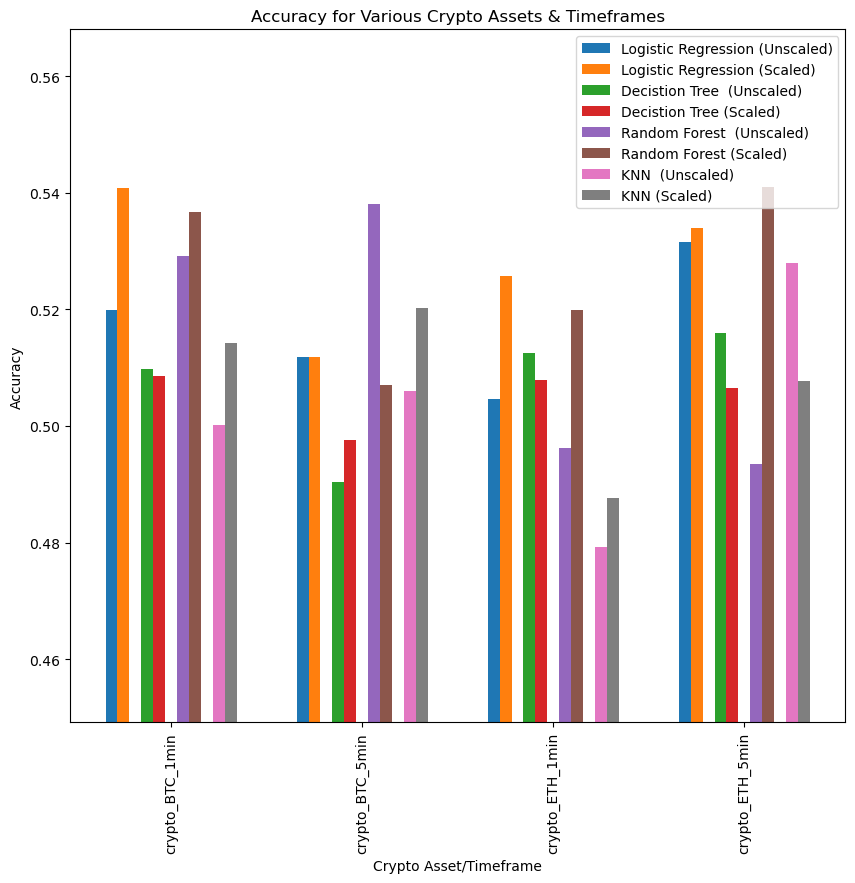

In [49]:
# Accuracy Comparison Barplot

X = ['crypto_BTC_1min','crypto_BTC_5min','crypto_ETH_1min', 'crypto_ETH_5min']

logreg_npa = np.array(accuracy_unstack_df['Accuracy-unscaled']['Logistic Regression'])
dectree_npa = np.array(accuracy_unstack_df['Accuracy-unscaled']['Decision Tree'])
rndfor_npa = np.array(accuracy_unstack_df['Accuracy-unscaled']['Random Forest'])
knn_npa = np.array(accuracy_unstack_df['Accuracy-unscaled']['KNN'])

logreg_scaled_npa = np.array(accuracy_unstack_df['Accuracy-scaled']['Logistic Regression'])
dectree_scaled_npa = np.array(accuracy_unstack_df['Accuracy-scaled']['Decision Tree'])
rndfor_scaled_npa = np.array(accuracy_unstack_df['Accuracy-scaled']['Random Forest'])
knn_scaled_npa = np.array(accuracy_unstack_df['Accuracy-scaled']['KNN'])

plt.figure(figsize=(10, 9))

X_axis = np.arange(len(X))

sep = 1/16
plt.bar(X_axis - 5*sep, logreg_npa, sep, label = "Logistic Regression (Unscaled)")
plt.bar(X_axis - 4*sep, logreg_scaled_npa, sep, label = "Logistic Regression (Scaled)")
plt.bar(X_axis - 2*sep, dectree_npa, sep, label = "Decistion Tree  (Unscaled)")
plt.bar(X_axis - 1*sep, dectree_scaled_npa, sep, label = "Decistion Tree (Scaled)")
plt.bar(X_axis + 1*sep, rndfor_npa, sep, label = "Random Forest  (Unscaled)")
plt.bar(X_axis + 2*sep, rndfor_scaled_npa, sep, label = "Random Forest (Scaled)")
plt.bar(X_axis + 4*sep, knn_npa, sep, label = "KNN  (Unscaled)")
plt.bar(X_axis + 5*sep, knn_scaled_npa, sep, label = "KNN (Scaled)")

max_y_lim = max(supervised_learning_summary_df[('Accuracy-unscaled',' ')]) + .03
min_y_lim = min(supervised_learning_summary_df[('Accuracy-unscaled',' ')]) - .03
plt.ylim(min_y_lim, max_y_lim)

plt.xticks(X_axis, X, rotation = 90)
plt.xlabel("Crypto Asset/Timeframe")
plt.ylabel("Accuracy")
plt.title("Accuracy for Various Crypto Assets & Timeframes")
plt.legend()

plt.show()

In [53]:
# Precision (Value=+1) Comparison DataFrame 

precision_1_df = supervised_learning_summary_df[[('Precision-unscaled','+1'),('Precision-scaled','+1')]]
precision_1_df.columns = [['Precision-unscaled+1','Precision-scaled+1']]
precision_1_unstack_df = precision_1_df.unstack()

print("Precision/0 for Various Crypto Assets & Timeframes:")
display(precision_1_unstack_df) 

Precision/0 for Various Crypto Assets & Timeframes:


Precision-unscaled+1                                \
                       Decision Tree       KNN Logistic Regression   
crypto_BTC_1min             0.523348  0.514412            0.520518   
crypto_BTC_5min             0.493023  0.508083            0.512931   
crypto_ETH_1min             0.522039  0.489429            0.508718   
crypto_ETH_5min             0.515294  0.525386            0.525292   

                              Precision-scaled+1            \
                Random Forest      Decision Tree       KNN   
crypto_BTC_1min      0.540093           0.522944  0.526998   
crypto_BTC_5min      0.539720           0.500000  0.522459   
crypto_ETH_1min      0.505399           0.517383  0.497585   
crypto_ETH_5min      0.493421           0.505855  0.506881   

                                                   
                Logistic Regression Random Forest  
crypto_BTC_1min            0.544606      0.547081  
crypto_BTC_5min            0.513514      0.509615  
crypto_ETH_1min            0.527921      0.526850  
crypto_ETH_5min            0.529289      0.536017

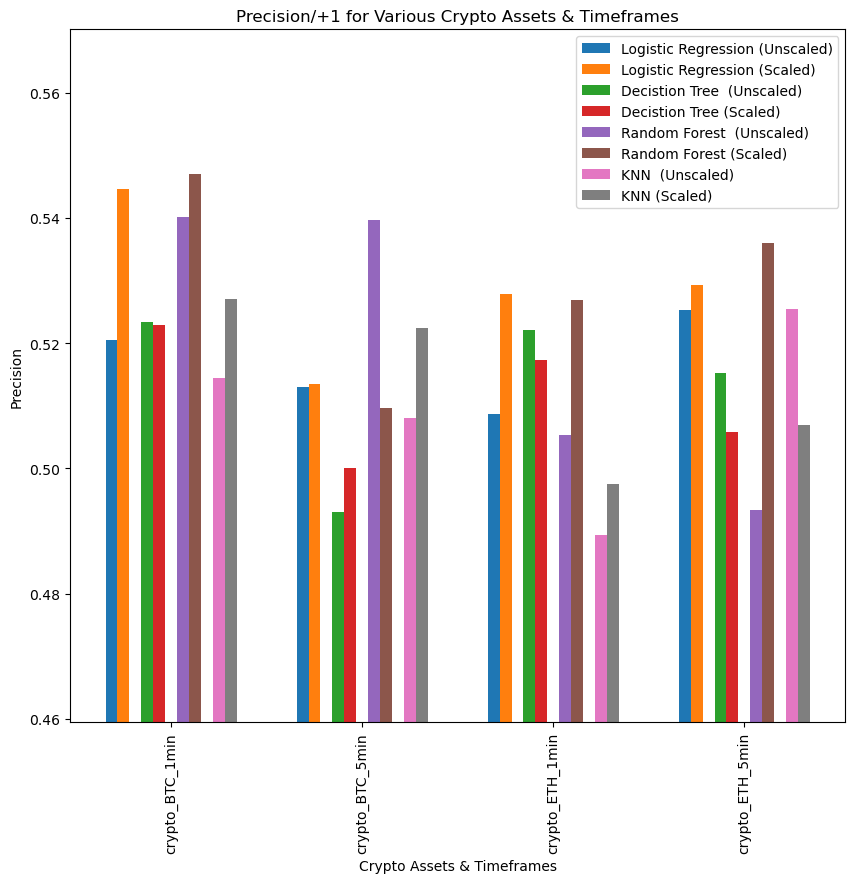

In [54]:
# Precision (Value=+1) Comparison Barplot

X = ['crypto_BTC_1min','crypto_BTC_5min','crypto_ETH_1min', 'crypto_ETH_5min']

logreg_npa = np.array(precision_1_unstack_df['Precision-unscaled+1']['Logistic Regression'])
dectree_npa = np.array(precision_1_unstack_df['Precision-unscaled+1']['Decision Tree'])
rndfor_npa = np.array(precision_1_unstack_df['Precision-unscaled+1']['Random Forest'])
knn_npa = np.array(precision_1_unstack_df['Precision-unscaled+1']['KNN'])

logreg_scaled_npa = np.array(precision_1_unstack_df['Precision-scaled+1']['Logistic Regression'])
dectree_scaled_npa = np.array(precision_1_unstack_df['Precision-scaled+1']['Decision Tree'])
rndfor_scaled_npa = np.array(precision_1_unstack_df['Precision-scaled+1']['Random Forest'])
knn_scaled_npa = np.array(precision_1_unstack_df['Precision-scaled+1']['KNN'])

plt.figure(figsize=(10, 9))

X_axis = np.arange(len(X))
  
sep = 1/16
plt.bar(X_axis - 5*sep, logreg_npa, sep, label = "Logistic Regression (Unscaled)")
plt.bar(X_axis - 4*sep, logreg_scaled_npa, sep, label = "Logistic Regression (Scaled)")
plt.bar(X_axis - 2*sep, dectree_npa, sep, label = "Decistion Tree  (Unscaled)")
plt.bar(X_axis - 1*sep, dectree_scaled_npa, sep, label = "Decistion Tree (Scaled)")
plt.bar(X_axis + 1*sep, rndfor_npa, sep, label = "Random Forest  (Unscaled)")
plt.bar(X_axis + 2*sep, rndfor_scaled_npa, sep, label = "Random Forest (Scaled)")
plt.bar(X_axis + 4*sep, knn_npa, sep, label = "KNN  (Unscaled)")
plt.bar(X_axis + 5*sep, knn_scaled_npa, sep, label = "KNN (Scaled)")

max_y_lim = max(supervised_learning_summary_df[('Precision-unscaled','+1')]) + .03
min_y_lim = min(supervised_learning_summary_df[('Precision-unscaled','+1')]) - .03
plt.ylim(min_y_lim, max_y_lim)
plt.xticks(X_axis, X, rotation = 90)
plt.xlabel("Crypto Assets & Timeframes")
plt.ylabel("Precision")
plt.title("Precision/+1 for Various Crypto Assets & Timeframes")
plt.legend()

plt.show()

In [55]:
# Precision (Value=-1) Comparison DataFrame 

precision_neg1_df = supervised_learning_summary_df[[('Precision-unscaled','-1'),('Precision-scaled','-1')]]
precision_neg1_df.columns = [['Precision-unscaled-1','Precision-scaled-1']]
precision_neg1_unstack_df = precision_neg1_df.unstack()

print("Precision/0 for Various Crypto Assets & Timeframes:")
display(precision_neg1_unstack_df) 


Precision/0 for Various Crypto Assets & Timeframes:


Precision-unscaled-1                                \
                       Decision Tree       KNN Logistic Regression   
crypto_BTC_1min             0.494522  0.484429            0.516229   
crypto_BTC_5min             0.487864  0.503667            0.510582   
crypto_ETH_1min             0.502857  0.468127            0.484765   
crypto_ETH_5min             0.516827  0.530928            0.541284   

                              Precision-scaled-1            \
                Random Forest      Decision Tree       KNN   
crypto_BTC_1min      0.515877           0.493500  0.499236   
crypto_BTC_5min      0.536232           0.495050  0.517900   
crypto_ETH_1min      0.484492           0.498088  0.476262   
crypto_ETH_5min      0.493506           0.507246  0.508642   

                                                   
                Logistic Regression Random Forest  
crypto_BTC_1min            0.534709      0.524081  
crypto_BTC_5min            0.510050      0.504695  
crypto_ETH_1min            0.521851      0.511239  
crypto_ETH_5min            0.539945      0.547425

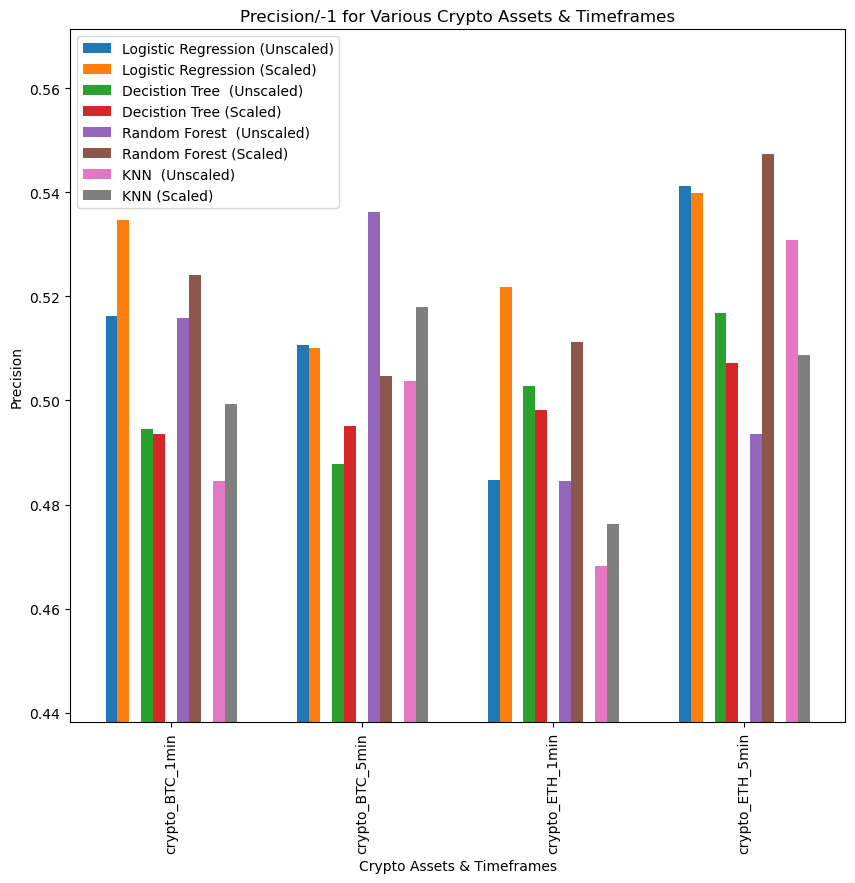

In [56]:
# Precision (Value=-1) Comparison Barplot

X = ['crypto_BTC_1min','crypto_BTC_5min','crypto_ETH_1min', 'crypto_ETH_5min']

logreg_npa = np.array(precision_neg1_unstack_df['Precision-unscaled-1']['Logistic Regression'])
dectree_npa = np.array(precision_neg1_unstack_df['Precision-unscaled-1']['Decision Tree'])
rndfor_npa = np.array(precision_neg1_unstack_df['Precision-unscaled-1']['Random Forest'])
knn_npa = np.array(precision_neg1_unstack_df['Precision-unscaled-1']['KNN'])

logreg_scaled_npa = np.array(precision_neg1_unstack_df['Precision-scaled-1']['Logistic Regression'])
dectree_scaled_npa = np.array(precision_neg1_unstack_df['Precision-scaled-1']['Decision Tree'])
rndfor_scaled_npa = np.array(precision_neg1_unstack_df['Precision-scaled-1']['Random Forest'])
knn_scaled_npa = np.array(precision_neg1_unstack_df['Precision-scaled-1']['KNN'])

plt.figure(figsize=(10, 9))

X_axis = np.arange(len(X))
  
sep = 1/16
plt.bar(X_axis - 5*sep, logreg_npa, sep, label = "Logistic Regression (Unscaled)")
plt.bar(X_axis - 4*sep, logreg_scaled_npa, sep, label = "Logistic Regression (Scaled)")
plt.bar(X_axis - 2*sep, dectree_npa, sep, label = "Decistion Tree  (Unscaled)")
plt.bar(X_axis - 1*sep, dectree_scaled_npa, sep, label = "Decistion Tree (Scaled)")
plt.bar(X_axis + 1*sep, rndfor_npa, sep, label = "Random Forest  (Unscaled)")
plt.bar(X_axis + 2*sep, rndfor_scaled_npa, sep, label = "Random Forest (Scaled)")
plt.bar(X_axis + 4*sep, knn_npa, sep, label = "KNN  (Unscaled)")
plt.bar(X_axis + 5*sep, knn_scaled_npa, sep, label = "KNN (Scaled)")

max_y_lim = max(supervised_learning_summary_df[('Precision-unscaled','-1')]) + .03
min_y_lim = min(supervised_learning_summary_df[('Precision-unscaled','-1')]) - .03
plt.ylim(min_y_lim, max_y_lim)
plt.xticks(X_axis, X, rotation = 90)
plt.xlabel("Crypto Assets & Timeframes")
plt.ylabel("Precision")
plt.title("Precision/-1 for Various Crypto Assets & Timeframes")
plt.legend()

plt.show()

In [59]:
# Recall (Value=+1) Comparison DataFrame 

recall_1_df = supervised_learning_summary_df[[('Recall-unscaled','+1'),('Recall-scaled','+1')]]
recall_1_df.columns = [['Recall-unscaled+1','Recall-scaled+1']]
recall_1_unstack_df = recall_1_df.unstack()

print("recall/0 for Various Crypto Assets & Timeframes:")
display(recall_1_unstack_df) 

recall/0 for Various Crypto Assets & Timeframes:


Recall-unscaled+1                                              \
                    Decision Tree       KNN Logistic Regression Random Forest   
crypto_BTC_1min          0.539265  0.526555            0.857921      0.577848   
crypto_BTC_5min          0.501182  0.520095            0.562648      0.546099   
crypto_ETH_1min          0.521320  0.498854            0.829436      0.558001   
crypto_ETH_5min          0.521429  0.566667            0.642857      0.535714   

                Recall-scaled+1                                              
                  Decision Tree       KNN Logistic Regression Random Forest  
crypto_BTC_1min        0.522469  0.553790            0.662279      0.582842  
crypto_BTC_5min        0.517730  0.522459            0.539007      0.501182  
crypto_ETH_1min        0.518569  0.519486            0.658872      0.571298  
crypto_ETH_5min        0.514286  0.526190            0.602381      0.602381

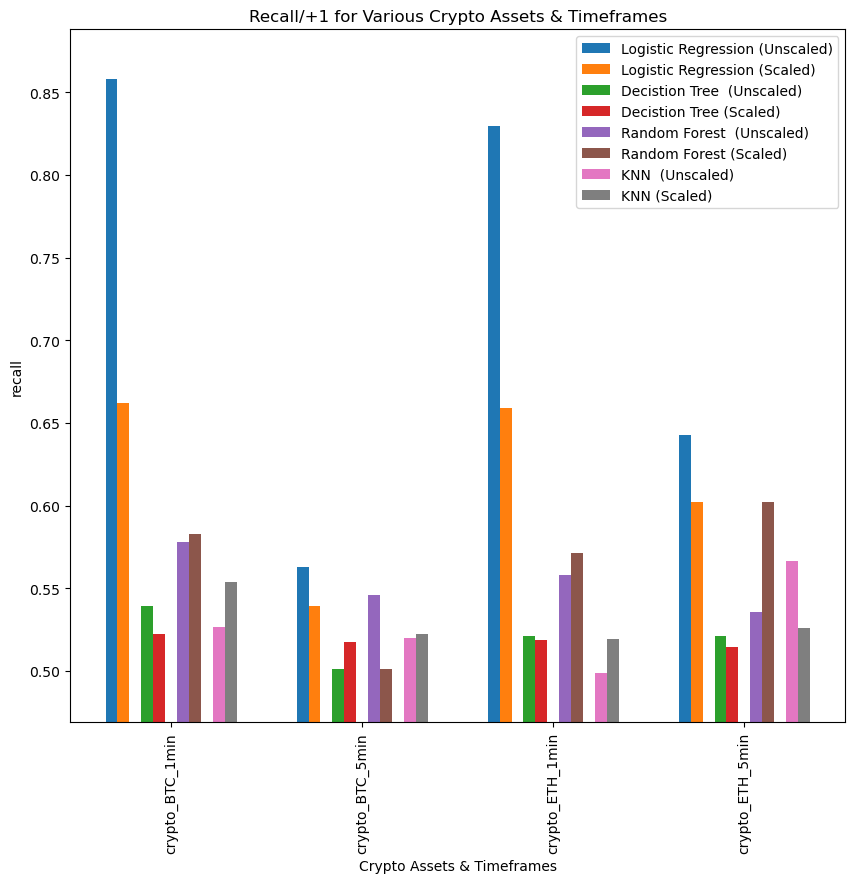

In [60]:
# Recall (Value=+1) Comparison Barplot

X = ['crypto_BTC_1min','crypto_BTC_5min','crypto_ETH_1min', 'crypto_ETH_5min']

logreg_npa = np.array(recall_1_unstack_df['Recall-unscaled+1']['Logistic Regression'])
dectree_npa = np.array(recall_1_unstack_df['Recall-unscaled+1']['Decision Tree'])
rndfor_npa = np.array(recall_1_unstack_df['Recall-unscaled+1']['Random Forest'])
knn_npa = np.array(recall_1_unstack_df['Recall-unscaled+1']['KNN'])

logreg_scaled_npa = np.array(recall_1_unstack_df['Recall-scaled+1']['Logistic Regression'])
dectree_scaled_npa = np.array(recall_1_unstack_df['Recall-scaled+1']['Decision Tree'])
rndfor_scaled_npa = np.array(recall_1_unstack_df['Recall-scaled+1']['Random Forest'])
knn_scaled_npa = np.array(recall_1_unstack_df['Recall-scaled+1']['KNN'])

plt.figure(figsize=(10, 9))

X_axis = np.arange(len(X))
  
sep = 1/16
plt.bar(X_axis - 5*sep, logreg_npa, sep, label = "Logistic Regression (Unscaled)")
plt.bar(X_axis - 4*sep, logreg_scaled_npa, sep, label = "Logistic Regression (Scaled)")
plt.bar(X_axis - 2*sep, dectree_npa, sep, label = "Decistion Tree  (Unscaled)")
plt.bar(X_axis - 1*sep, dectree_scaled_npa, sep, label = "Decistion Tree (Scaled)")
plt.bar(X_axis + 1*sep, rndfor_npa, sep, label = "Random Forest  (Unscaled)")
plt.bar(X_axis + 2*sep, rndfor_scaled_npa, sep, label = "Random Forest (Scaled)")
plt.bar(X_axis + 4*sep, knn_npa, sep, label = "KNN  (Unscaled)")
plt.bar(X_axis + 5*sep, knn_scaled_npa, sep, label = "KNN (Scaled)")

max_y_lim = max(supervised_learning_summary_df[('Recall-unscaled','+1')]) + .03
min_y_lim = min(supervised_learning_summary_df[('Recall-unscaled','+1')]) - .03
plt.ylim(min_y_lim, max_y_lim)
plt.xticks(X_axis, X, rotation = 90)
plt.xlabel("Crypto Assets & Timeframes")
plt.ylabel("recall")
plt.title("Recall/+1 for Various Crypto Assets & Timeframes")
plt.legend()

plt.show()

In [61]:
# Recall (Value=-1) Comparison DataFrame 

recall_neg1_df = supervised_learning_summary_df[[('Recall-unscaled','-1'),('Recall-scaled','-1')]]
recall_neg1_df.columns = [['Recall-unscaled-1','Recall-scaled-1']]
recall_neg1_unstack_df = recall_neg1_df.unstack()

print("recall/0 for Various Crypto Assets & Timeframes:")
display(recall_neg1_unstack_df) 

recall/0 for Various Crypto Assets & Timeframes:


Recall-unscaled-1                                              \
                    Decision Tree       KNN Logistic Regression Random Forest   
crypto_BTC_1min          0.478554  0.472289            0.160964      0.477590   
crypto_BTC_5min          0.479714  0.491647            0.460621      0.529833   
crypto_ETH_1min          0.503577  0.458751            0.166905      0.432046   
crypto_ETH_5min          0.510689  0.489311            0.420428      0.451306   

                Recall-scaled-1                                              
                  Decision Tree       KNN Logistic Regression Random Forest  
crypto_BTC_1min        0.493976  0.472289            0.412048      0.487711  
crypto_BTC_5min        0.477327  0.517900            0.484487      0.513126  
crypto_ETH_1min        0.496900  0.454459            0.387220      0.466381  
crypto_ETH_5min        0.498812  0.489311            0.465558      0.479810

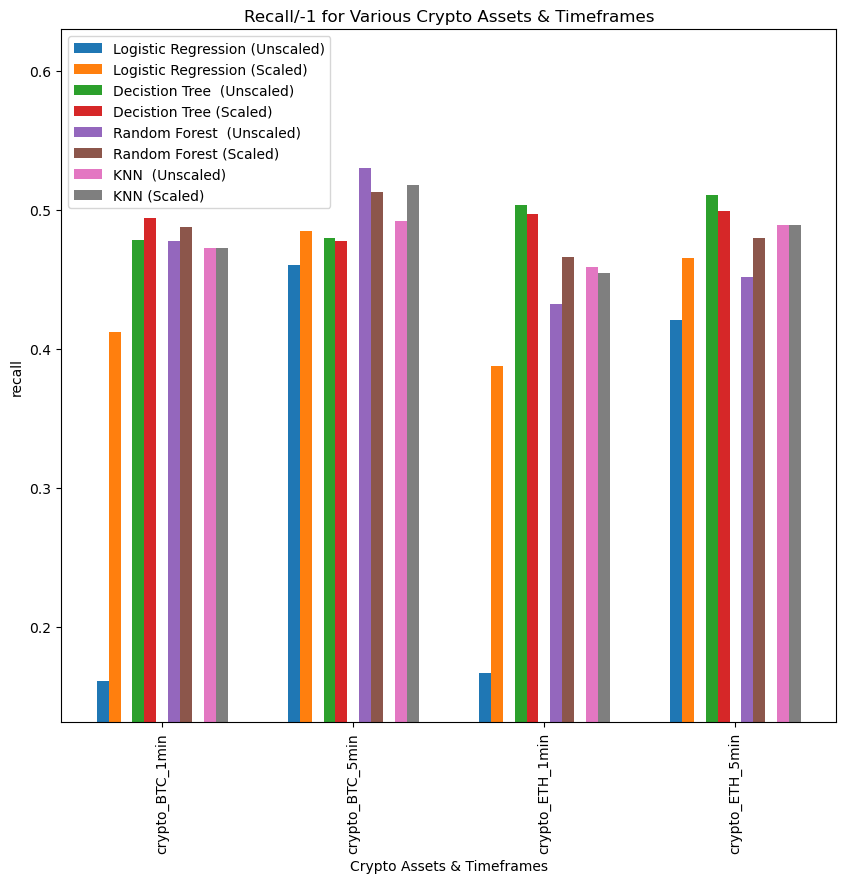

In [67]:
# Recall (Value=-1) Comparison Barplot

X = ['crypto_BTC_1min','crypto_BTC_5min','crypto_ETH_1min', 'crypto_ETH_5min']

logreg_npa = np.array(recall_neg1_unstack_df['Recall-unscaled-1']['Logistic Regression'])
dectree_npa = np.array(recall_neg1_unstack_df['Recall-unscaled-1']['Decision Tree'])
rndfor_npa = np.array(recall_neg1_unstack_df['Recall-unscaled-1']['Random Forest'])
knn_npa = np.array(recall_neg1_unstack_df['Recall-unscaled-1']['KNN'])

logreg_scaled_npa = np.array(recall_neg1_unstack_df['Recall-scaled-1']['Logistic Regression'])
dectree_scaled_npa = np.array(recall_neg1_unstack_df['Recall-scaled-1']['Decision Tree'])
rndfor_scaled_npa = np.array(recall_neg1_unstack_df['Recall-scaled-1']['Random Forest'])
knn_scaled_npa = np.array(recall_neg1_unstack_df['Recall-scaled-1']['KNN'])

plt.figure(figsize=(10, 9))

X_axis = np.arange(len(X))
  
sep = 1/16
plt.bar(X_axis - 5*sep, logreg_npa, sep, label = "Logistic Regression (Unscaled)")
plt.bar(X_axis - 4*sep, logreg_scaled_npa, sep, label = "Logistic Regression (Scaled)")
plt.bar(X_axis - 2*sep, dectree_npa, sep, label = "Decistion Tree  (Unscaled)")
plt.bar(X_axis - 1*sep, dectree_scaled_npa, sep, label = "Decistion Tree (Scaled)")
plt.bar(X_axis + 1*sep, rndfor_npa, sep, label = "Random Forest  (Unscaled)")
plt.bar(X_axis + 2*sep, rndfor_scaled_npa, sep, label = "Random Forest (Scaled)")
plt.bar(X_axis + 4*sep, knn_npa, sep, label = "KNN  (Unscaled)")
plt.bar(X_axis + 5*sep, knn_scaled_npa, sep, label = "KNN (Scaled)")

max_y_lim = max(supervised_learning_summary_df[('Recall-unscaled','-1')]) + .1
min_y_lim = min(supervised_learning_summary_df[('Recall-unscaled','-1')]) - .03
plt.ylim(min_y_lim, max_y_lim)
plt.xticks(X_axis, X, rotation = 90)
plt.xlabel("Crypto Assets & Timeframes")
plt.ylabel("recall")
plt.title("Recall/-1 for Various Crypto Assets & Timeframes")
plt.legend()

plt.show()

In [68]:
# F1-Score (Value=+1) Comparison DataFrame 

f1_score_1_df = supervised_learning_summary_df[[('F1-Score-unscaled','+1'),('F1-Score-scaled','+1')]]
f1_score_1_df.columns = [['F1-Score-unscaled+1','F1-Score-scaled+1']]
f1_score_1_unstack_df = f1_score_1_df.unstack()

print("f1_score/0 for Various Crypto Assets & Timeframes:")
display(f1_score_1_unstack_df) 


f1_score/0 for Various Crypto Assets & Timeframes:


F1-Score-unscaled+1                                \
                      Decision Tree       KNN Logistic Regression   
crypto_BTC_1min            0.531187  0.520413            0.647926   
crypto_BTC_5min            0.497069  0.514019            0.536640   
crypto_ETH_1min            0.521679  0.494096            0.630643   
crypto_ETH_5min            0.518343  0.545246            0.578158   

                              F1-Score-scaled+1                                \
                Random Forest     Decision Tree       KNN Logistic Regression   
crypto_BTC_1min      0.558333          0.522707  0.540062            0.597706   
crypto_BTC_5min      0.542891          0.508711  0.522459            0.525952   
crypto_ETH_1min      0.530399          0.517976  0.508300            0.586172   
crypto_ETH_5min      0.513699          0.510035  0.516355            0.563474   

                               
                Random Forest  
crypto_BTC_1min      0.564396  
crypto_BTC_5min      0.505364  
crypto_ETH_1min      0.548174  
crypto_ETH_5min      0.567265

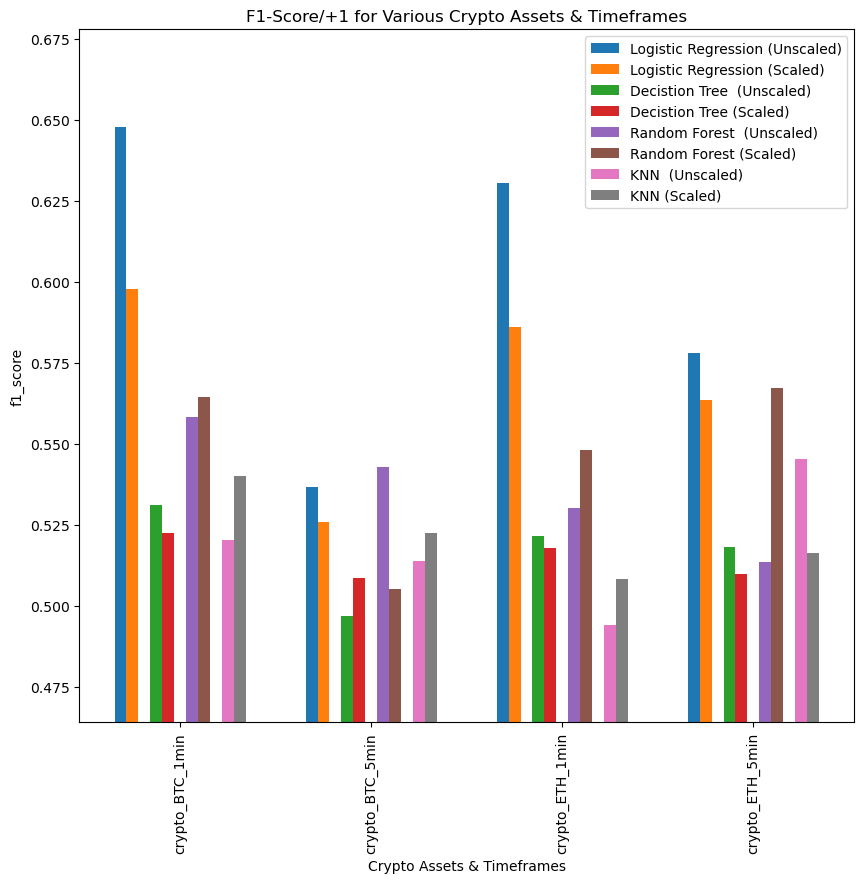

In [69]:
# F1-Score (Value=+1) Comparison Barplot

X = ['crypto_BTC_1min','crypto_BTC_5min','crypto_ETH_1min', 'crypto_ETH_5min']

logreg_npa = np.array(f1_score_1_unstack_df['F1-Score-unscaled+1']['Logistic Regression'])
dectree_npa = np.array(f1_score_1_unstack_df['F1-Score-unscaled+1']['Decision Tree'])
rndfor_npa = np.array(f1_score_1_unstack_df['F1-Score-unscaled+1']['Random Forest'])
knn_npa = np.array(f1_score_1_unstack_df['F1-Score-unscaled+1']['KNN'])

logreg_scaled_npa = np.array(f1_score_1_unstack_df['F1-Score-scaled+1']['Logistic Regression'])
dectree_scaled_npa = np.array(f1_score_1_unstack_df['F1-Score-scaled+1']['Decision Tree'])
rndfor_scaled_npa = np.array(f1_score_1_unstack_df['F1-Score-scaled+1']['Random Forest'])
knn_scaled_npa = np.array(f1_score_1_unstack_df['F1-Score-scaled+1']['KNN'])

plt.figure(figsize=(10, 9))

X_axis = np.arange(len(X))
  
sep = 1/16
plt.bar(X_axis - 5*sep, logreg_npa, sep, label = "Logistic Regression (Unscaled)")
plt.bar(X_axis - 4*sep, logreg_scaled_npa, sep, label = "Logistic Regression (Scaled)")
plt.bar(X_axis - 2*sep, dectree_npa, sep, label = "Decistion Tree  (Unscaled)")
plt.bar(X_axis - 1*sep, dectree_scaled_npa, sep, label = "Decistion Tree (Scaled)")
plt.bar(X_axis + 1*sep, rndfor_npa, sep, label = "Random Forest  (Unscaled)")
plt.bar(X_axis + 2*sep, rndfor_scaled_npa, sep, label = "Random Forest (Scaled)")
plt.bar(X_axis + 4*sep, knn_npa, sep, label = "KNN  (Unscaled)")
plt.bar(X_axis + 5*sep, knn_scaled_npa, sep, label = "KNN (Scaled)")

max_y_lim = max(supervised_learning_summary_df[('F1-Score-unscaled','+1')]) + .03
min_y_lim = min(supervised_learning_summary_df[('F1-Score-unscaled','+1')]) - .03
plt.ylim(min_y_lim, max_y_lim)
plt.xticks(X_axis, X, rotation = 90)
plt.xlabel("Crypto Assets & Timeframes")
plt.ylabel("f1_score")
plt.title("F1-Score/+1 for Various Crypto Assets & Timeframes")
plt.legend()

plt.show()

In [70]:
# F1-Score (Value=-1) Comparison DataFrame 

f1_score_neg1_df = supervised_learning_summary_df[[('F1-Score-unscaled','-1'),('F1-Score-scaled','-1')]]
f1_score_neg1_df.columns = [['F1-Score-unscaled-1','F1-Score-scaled-1']]
f1_score_neg1_unstack_df = f1_score_neg1_df.unstack()

print("f1_score/0 for Various Crypto Assets & Timeframes:")
display(f1_score_neg1_unstack_df) 

f1_score/0 for Various Crypto Assets & Timeframes:


F1-Score-unscaled-1                                \
                      Decision Tree       KNN Logistic Regression   
crypto_BTC_1min            0.486407  0.478282            0.245408   
crypto_BTC_5min            0.483755  0.497585            0.484316   
crypto_ETH_1min            0.503217  0.463391            0.248315   
crypto_ETH_5min            0.513740  0.509271            0.473262   

                              F1-Score-scaled-1                                \
                Random Forest     Decision Tree       KNN Logistic Regression   
crypto_BTC_1min      0.495996          0.493738  0.485389            0.465433   
crypto_BTC_5min      0.533013          0.486027  0.517900            0.496940   
crypto_ETH_1min      0.456768          0.497493  0.465105            0.444566   
crypto_ETH_5min      0.471464          0.502994  0.498789            0.500000   

                               
                Random Forest  
crypto_BTC_1min      0.505242  
crypto_BTC_5min      0.508876  
crypto_ETH_1min      0.487781  
crypto_ETH_5min      0.511392

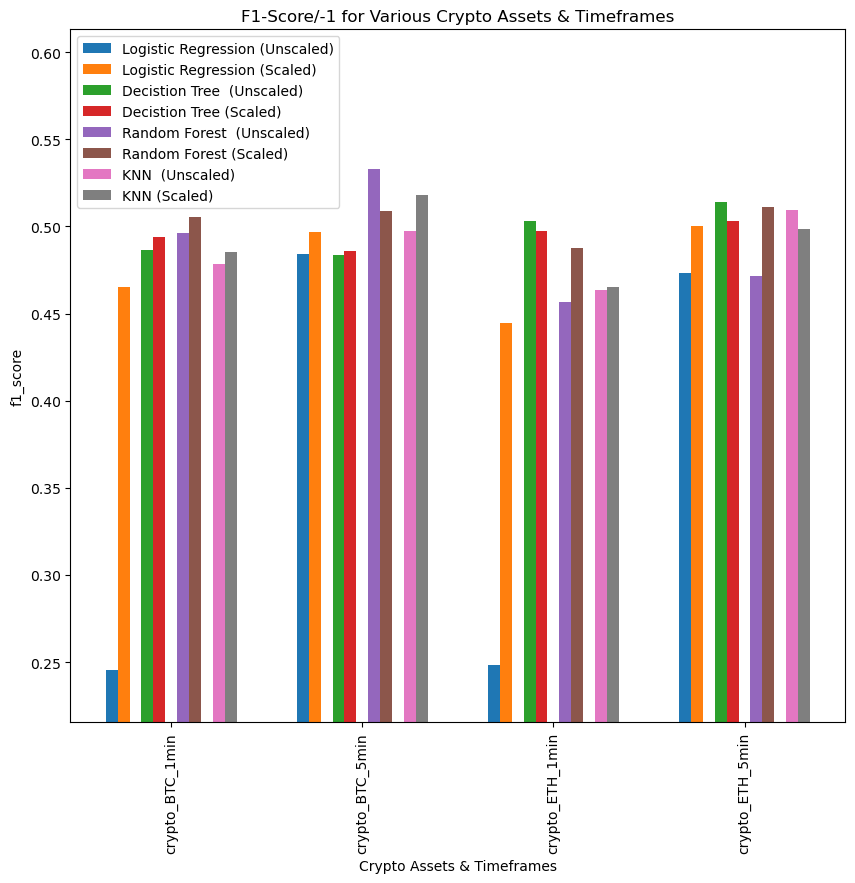

In [74]:

# F1-Score (Value=-1) Comparison Barplot

X = ['crypto_BTC_1min','crypto_BTC_5min','crypto_ETH_1min', 'crypto_ETH_5min']

logreg_npa = np.array(f1_score_neg1_unstack_df['F1-Score-unscaled-1']['Logistic Regression'])
dectree_npa = np.array(f1_score_neg1_unstack_df['F1-Score-unscaled-1']['Decision Tree'])
rndfor_npa = np.array(f1_score_neg1_unstack_df['F1-Score-unscaled-1']['Random Forest'])
knn_npa = np.array(f1_score_neg1_unstack_df['F1-Score-unscaled-1']['KNN'])

logreg_scaled_npa = np.array(f1_score_neg1_unstack_df['F1-Score-scaled-1']['Logistic Regression'])
dectree_scaled_npa = np.array(f1_score_neg1_unstack_df['F1-Score-scaled-1']['Decision Tree'])
rndfor_scaled_npa = np.array(f1_score_neg1_unstack_df['F1-Score-scaled-1']['Random Forest'])
knn_scaled_npa = np.array(f1_score_neg1_unstack_df['F1-Score-scaled-1']['KNN'])

plt.figure(figsize=(10, 9))

X_axis = np.arange(len(X))
  
sep = 1/16
plt.bar(X_axis - 5*sep, logreg_npa, sep, label = "Logistic Regression (Unscaled)")
plt.bar(X_axis - 4*sep, logreg_scaled_npa, sep, label = "Logistic Regression (Scaled)")
plt.bar(X_axis - 2*sep, dectree_npa, sep, label = "Decistion Tree  (Unscaled)")
plt.bar(X_axis - 1*sep, dectree_scaled_npa, sep, label = "Decistion Tree (Scaled)")
plt.bar(X_axis + 1*sep, rndfor_npa, sep, label = "Random Forest  (Unscaled)")
plt.bar(X_axis + 2*sep, rndfor_scaled_npa, sep, label = "Random Forest (Scaled)")
plt.bar(X_axis + 4*sep, knn_npa, sep, label = "KNN  (Unscaled)")
plt.bar(X_axis + 5*sep, knn_scaled_npa, sep, label = "KNN (Scaled)")

max_y_lim = max(supervised_learning_summary_df[('F1-Score-unscaled','-1')]) + .08
min_y_lim = min(supervised_learning_summary_df[('F1-Score-unscaled','-1')]) - .03
plt.ylim(min_y_lim, max_y_lim)
plt.xticks(X_axis, X, rotation = 90)
plt.xlabel("Crypto Assets & Timeframes")
plt.ylabel("f1_score")
plt.title("F1-Score/-1 for Various Crypto Assets & Timeframes")
plt.legend()

plt.show()